INSTALLING AND IMPORTING THE DEPENDENCIES

In [2]:
import mediapipe as mp
print(mp.__version__)

0.10.21


In [3]:
import sys
sys.executable

'C:\\Users\\Vedant Mukhekar\\anaconda3\\envs\\mp-env\\python.exe'

In [4]:
!pip install mediapipe opencv-python pandas scikit-learn

  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
  Using cached protobuf-4.25.8-cp39-cp39-win_amd64.whl.metadata (541 bytes)
Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
Using cached protobuf-4.25.8-cp39-cp39-win_amd64.whl (413 kB)

  Attempting uninstall: protobuf

    Found existing installation: protobuf 6.32.1

    Uninstalling protobuf-6.32.1:

      Successfully uninstalled protobuf-6.32.1

   ---------------------------------------- 0/2 [protobuf]
   ---------------------------------------- 0/2 [protobuf]
   ---------------------------------------- 0/2 [protobuf]
   ---------------------------------------- 0/2 [protobuf]
   ---------------------------------------- 0/2 [protobuf]
   ---------------------------------------- 0/2 [protobuf]
   ---------------------------------------- 0/2 [protobuf]
   ---------------------------------------- 0/2 [protobuf]
   ---------------------------------------- 0/2 [protobuf]
   -------------------------------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.73.1 requires protobuf<7.0.0,>=6.30.0, but you have protobuf 4.25.8 which is incompatible.
tensorflow 2.20.0 requires protobuf>=5.28.0, but you have protobuf 4.25.8 which is incompatible.


In [5]:
import mediapipe as mp                                # importing media pipeline
import cv2                                            # importing open cv

In [6]:
mp_drawing = mp.solutions.drawing_utils               # drawing helpers
mp_holistic = mp.solutions.holistic                   # Media pipe solution
mp_face_mesh = mp.solutions.face_mesh 

MAKE SOME DETECTION

In [7]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        results = holistic.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Face landmarks
        if results.face_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.face_landmarks,
                mp_face_mesh.FACEMESH_TESSELATION,
                mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
            )

        # Right hand
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.right_hand_landmarks,
                mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
            )

        # Left hand
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.left_hand_landmarks,
                mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
            )

        # Pose
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_holistic.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )

        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [7]:
results.pose_landmarks.landmark

[x: 0.426808894
y: 0.584207475
z: -0.699856758
visibility: 0.999806345
, x: 0.446523607
y: 0.530163646
z: -0.671645761
visibility: 0.99957484
, x: 0.463046849
y: 0.526699
z: -0.671827435
visibility: 0.999638379
, x: 0.475983769
y: 0.524585068
z: -0.672175944
visibility: 0.99957335
, x: 0.396231353
y: 0.535437822
z: -0.674856067
visibility: 0.999569833
, x: 0.380896062
y: 0.53534019
z: -0.674412072
visibility: 0.999624074
, x: 0.368794382
y: 0.535869241
z: -0.67459929
visibility: 0.999557614
, x: 0.492809534
y: 0.534929037
z: -0.411003679
visibility: 0.999612272
, x: 0.348747194
y: 0.554945111
z: -0.404626906
visibility: 0.999664426
, x: 0.461416334
y: 0.624278486
z: -0.594784141
visibility: 0.9997859
, x: 0.395453423
y: 0.632879317
z: -0.592580378
visibility: 0.999816239
, x: 0.61823684
y: 0.742492914
z: -0.240047812
visibility: 0.999046445
, x: 0.252227664
y: 0.844271839
z: -0.281813323
visibility: 0.99762243
, x: 0.798405468
y: 0.964100659
z: -0.224783227
visibility: 0.352258384
, x:

In [8]:
results.face_landmarks.landmark

[x: 0.416402578
y: 0.632057667
z: -0.0171506703
, x: 0.415147394
y: 0.602959931
z: -0.0429503694
, x: 0.415208817
y: 0.610797644
z: -0.0201351419
, x: 0.406000584
y: 0.567476
z: -0.0360232852
, x: 0.414582402
y: 0.592400849
z: -0.046789661
, x: 0.413689315
y: 0.577666342
z: -0.0450812057
, x: 0.411467016
y: 0.54206574
z: -0.0281082913
, x: 0.353926927
y: 0.542478502
z: 0.00428227475
, x: 0.410359055
y: 0.521104813
z: -0.0262899771
, x: 0.409760267
y: 0.507864177
z: -0.0300907772
, x: 0.40635097
y: 0.44874692
z: -0.0276336055
, x: 0.416623354
y: 0.636615753
z: -0.0155820549
, x: 0.416705966
y: 0.639412165
z: -0.0124883717
, x: 0.416699409
y: 0.63988775
z: -0.0085324673
, x: 0.416756
y: 0.642568
z: -0.00695063593
, x: 0.416980505
y: 0.646321297
z: -0.00790107157
, x: 0.41722855
y: 0.651208937
z: -0.00912352838
, x: 0.417505294
y: 0.656765521
z: -0.00735134864
, x: 0.417987734
y: 0.666971564
z: 0.00164605118
, x: 0.415251851
y: 0.607675374
z: -0.038183976
, x: 0.407022119
y: 0.606219172
z

Capturing landmark and exporting to csv

In [9]:
import csv
import os
import numpy as np

In [10]:
len(results.face_landmarks.landmark)

468

In [11]:
len(results.pose_landmarks.landmark)

33

In [12]:
len(results.face_landmarks.landmark)+len(results.pose_landmarks.landmark)

501

In [13]:
num_coords = len(results.face_landmarks.landmark)+len(results.pose_landmarks.landmark)
num_coords

501

In [14]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [15]:
landmarks

['class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 '

In [17]:
#with open('coords.csv', mode='w', newline='') as f:
 #     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  #    csv_writer.writerow(landmarks)

In [81]:
#with open('coords.csv', mode='a', newline='') as f:
 #    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

In [82]:
import cv2
import mediapipe as mp
import csv
import numpy as np
import os

# Set your class name (label for data collection)
class_name = 'Mouth_Open'

# Prepare MediaPipe modules
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

# CSV file setup (writes header only once if file doesn't exist)
if not os.path.exists('coords.csv'):
    with open('coords.csv', mode='w', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

        # Temporary holistic object to count landmarks
        with mp_holistic.Holistic() as holistic:
            dummy_image = np.zeros((480, 640, 3), dtype=np.uint8)
            result = holistic.process(dummy_image)
            num_pose = len(result.pose_landmarks.landmark) if result.pose_landmarks else 33
            num_face = len(result.face_landmarks.landmark) if result.face_landmarks else 468

        # Create header
        landmarks = ['class']
        for val in range(1, num_pose + num_face + 1):
            landmarks += [f'x{val}', f'y{val}', f'z{val}', f'v{val}']
        csv_writer.writerow(landmarks)

# Start webcam
cap = cv2.VideoCapture(0)

# Run MediaPipe holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = holistic.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Face landmarks
        if results.face_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.face_landmarks,
                mp_face_mesh.FACEMESH_TESSELATION,
                mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
            )

        # Right hand
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.right_hand_landmarks,
                mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
            )

        # Left hand
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.left_hand_landmarks,
                mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
            )

        # Pose
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_holistic.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )

        # EXPORT COORDINATES
        try:
            # Extract Pose Landmarks
            pose = results.pose_landmarks.landmark if results.pose_landmarks else []
            pose_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in pose]).flatten())

            # Extract Face Landmarks
            face = results.face_landmarks.landmark if results.face_landmarks else []
            face_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in face]).flatten())

            # Combine
            row = pose_row + face_row
            row.insert(0, class_name)

            # Export
            with open('coords.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row)

        except:
            pass

        # Show webcam feed
        cv2.imshow('Raw Webcam Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


STEP 3 - TRAIN CUSTOM MODEL USING DATASET

3.1 - READ IN COLLECTED DATA AND PROCESS

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('coords.csv')

In [18]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,Mouth_Open,0.574821,0.549625,-0.905013,0.999825,0.594390,0.493657,-0.862016,0.999592,0.608655,...,-0.008665,0.0,0.634481,0.506197,0.006459,0.0,0.638795,0.501972,0.006689,0.0
1,Mouth_Open,0.570247,0.558867,-1.261756,0.999764,0.594189,0.498799,-1.242294,0.999426,0.608723,...,-0.011128,0.0,0.633667,0.511331,0.002078,0.0,0.638219,0.507316,0.001948,0.0
2,Mouth_Open,0.566971,0.566695,-1.203559,0.999734,0.593846,0.505124,-1.183870,0.999344,0.608729,...,-0.011228,0.0,0.635577,0.510443,0.001551,0.0,0.639984,0.506535,0.001332,0.0
3,Mouth_Open,0.569427,0.567193,-1.241351,0.999697,0.598311,0.505443,-1.214263,0.999250,0.613242,...,-0.012721,0.0,0.644090,0.511841,0.001498,0.0,0.648570,0.507181,0.001441,0.0
4,Mouth_Open,0.570116,0.568239,-1.305825,0.999626,0.600657,0.507114,-1.279426,0.999067,0.616032,...,-0.013369,0.0,0.646931,0.508990,0.000871,0.0,0.651415,0.504823,0.000703,0.0


In [19]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
4094,Mouth_Open_1,0.615053,0.419173,-1.885826,0.999731,0.642709,0.330627,-1.805597,0.999311,0.664675,...,-0.013451,0.0,0.724996,0.316934,0.023394,0.0,0.733028,0.305747,0.025237,0.0
4095,Mouth_Open_1,0.620672,0.420173,-1.795511,0.999711,0.647459,0.331109,-1.719447,0.999259,0.669959,...,-0.010845,0.0,0.730189,0.322040,0.024330,0.0,0.738455,0.309672,0.026298,0.0
4096,Mouth_Open_1,0.628426,0.420109,-1.641630,0.999701,0.656559,0.330746,-1.554102,0.999235,0.678340,...,-0.009410,0.0,0.733688,0.320477,0.026433,0.0,0.741966,0.308771,0.028425,0.0
4097,Mouth_Open_1,0.645453,0.417685,-1.602521,0.999681,0.673333,0.328699,-1.513460,0.999193,0.694723,...,-0.008885,0.0,0.752262,0.311299,0.031150,0.0,0.760045,0.301021,0.033119,0.0
4098,Mouth_Open_1,0.654624,0.414293,-1.622177,0.999636,0.681831,0.326634,-1.528347,0.999127,0.702551,...,-0.007545,0.0,0.756364,0.310526,0.029025,0.0,0.764152,0.299431,0.030845,0.0


In [20]:
df[df['class']=='Happy']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
44,Happy,0.525754,0.561688,-1.575266,0.998233,0.558543,0.486799,-1.553818,0.994552,0.576616,...,-0.018477,0.0,0.608651,0.476471,0.001321,0.0,0.614170,0.471556,0.001524,0.0
45,Happy,0.526654,0.561761,-1.772165,0.998145,0.559358,0.486879,-1.748480,0.994453,0.577597,...,-0.018574,0.0,0.614404,0.475433,0.002090,0.0,0.619783,0.470711,0.002327,0.0
46,Happy,0.533482,0.561455,-1.781283,0.998219,0.563440,0.486730,-1.752159,0.994696,0.581415,...,-0.019541,0.0,0.617108,0.474924,0.000867,0.0,0.622416,0.470380,0.001075,0.0
47,Happy,0.539064,0.561259,-1.730815,0.998276,0.567689,0.486633,-1.702410,0.994896,0.585290,...,-0.019106,0.0,0.617077,0.473231,0.001759,0.0,0.622345,0.468923,0.001982,0.0
48,Happy,0.540965,0.560526,-1.709003,0.998364,0.569391,0.486119,-1.684081,0.995202,0.586760,...,-0.018881,0.0,0.618874,0.472108,0.002103,0.0,0.624164,0.467432,0.002359,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,Happy,0.475103,0.513522,-0.958668,0.999414,0.494555,0.444704,-0.907967,0.999024,0.511655,...,-0.010711,0.0,0.538351,0.429504,0.008818,0.0,0.542638,0.424681,0.009414,0.0
833,Happy,0.476793,0.510424,-0.958467,0.999437,0.496098,0.441719,-0.908304,0.999060,0.513072,...,-0.010186,0.0,0.538767,0.428419,0.009194,0.0,0.543139,0.423641,0.009798,0.0
834,Happy,0.478412,0.506626,-0.960497,0.999465,0.497543,0.438818,-0.909024,0.999107,0.514486,...,-0.009323,0.0,0.539803,0.426392,0.010099,0.0,0.544203,0.421386,0.010736,0.0
835,Happy,0.479427,0.502853,-0.979250,0.999491,0.498714,0.436185,-0.926552,0.999148,0.515749,...,-0.009004,0.0,0.540704,0.425854,0.010311,0.0,0.545184,0.420692,0.010960,0.0


In [21]:
x = df.drop('class', axis=1)   #Features
y = df['class']                #Target Values

In [22]:
x

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,0.574821,0.549625,-0.905013,0.999825,0.594390,0.493657,-0.862016,0.999592,0.608655,0.492924,...,-0.008665,0.0,0.634481,0.506197,0.006459,0.0,0.638795,0.501972,0.006689,0.0
1,0.570247,0.558867,-1.261756,0.999764,0.594189,0.498799,-1.242294,0.999426,0.608723,0.497383,...,-0.011128,0.0,0.633667,0.511331,0.002078,0.0,0.638219,0.507316,0.001948,0.0
2,0.566971,0.566695,-1.203559,0.999734,0.593846,0.505124,-1.183870,0.999344,0.608729,0.503419,...,-0.011228,0.0,0.635577,0.510443,0.001551,0.0,0.639984,0.506535,0.001332,0.0
3,0.569427,0.567193,-1.241351,0.999697,0.598311,0.505443,-1.214263,0.999250,0.613242,0.503950,...,-0.012721,0.0,0.644090,0.511841,0.001498,0.0,0.648570,0.507181,0.001441,0.0
4,0.570116,0.568239,-1.305825,0.999626,0.600657,0.507114,-1.279426,0.999067,0.616032,0.505802,...,-0.013369,0.0,0.646931,0.508990,0.000871,0.0,0.651415,0.504823,0.000703,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094,0.615053,0.419173,-1.885826,0.999731,0.642709,0.330627,-1.805597,0.999311,0.664675,0.330092,...,-0.013451,0.0,0.724996,0.316934,0.023394,0.0,0.733028,0.305747,0.025237,0.0
4095,0.620672,0.420173,-1.795511,0.999711,0.647459,0.331109,-1.719447,0.999259,0.669959,0.330227,...,-0.010845,0.0,0.730189,0.322040,0.024330,0.0,0.738455,0.309672,0.026298,0.0
4096,0.628426,0.420109,-1.641630,0.999701,0.656559,0.330746,-1.554102,0.999235,0.678340,0.329855,...,-0.009410,0.0,0.733688,0.320477,0.026433,0.0,0.741966,0.308771,0.028425,0.0
4097,0.645453,0.417685,-1.602521,0.999681,0.673333,0.328699,-1.513460,0.999193,0.694723,0.328080,...,-0.008885,0.0,0.752262,0.311299,0.031150,0.0,0.760045,0.301021,0.033119,0.0


In [23]:
y

0         Mouth_Open
1         Mouth_Open
2         Mouth_Open
3         Mouth_Open
4         Mouth_Open
            ...     
4094    Mouth_Open_1
4095    Mouth_Open_1
4096    Mouth_Open_1
4097    Mouth_Open_1
4098    Mouth_Open_1
Name: class, Length: 4099, dtype: object

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)

In [25]:
x_train

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
3635,0.572791,0.291184,-0.073648,0.999554,0.583305,0.275029,-0.112328,0.999829,0.586411,0.275555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1895,0.532825,0.599956,-0.873866,0.999919,0.550533,0.550077,-0.815862,0.999853,0.562787,0.549981,...,-0.008277,0.0,0.576647,0.568048,0.005948,0.0,0.579441,0.566339,0.006043,0.0
3795,0.424773,0.438416,-1.392621,0.999844,0.455108,0.349288,-1.343197,0.999540,0.481053,0.343302,...,-0.013431,0.0,0.491935,0.312353,-0.009265,0.0,0.498222,0.300900,-0.010378,0.0
2676,0.549948,0.348585,-0.428086,0.999979,0.557720,0.333418,-0.411888,0.999935,0.562530,0.333343,...,0.000449,0.0,0.565794,0.325370,0.006099,0.0,0.566994,0.323691,0.006280,0.0
2555,0.618455,0.467766,-0.396313,0.999980,0.625215,0.452695,-0.380456,0.999950,0.629235,0.452949,...,0.000602,0.0,0.635696,0.448021,0.005570,0.0,0.637000,0.446487,0.005720,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,0.549594,0.521658,0.011629,0.990991,0.543839,0.507899,-0.020612,0.993545,0.544410,0.506160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3125,0.577747,0.207577,-0.279379,0.999703,0.576655,0.186552,-0.257166,0.999187,0.576823,0.185660,...,0.001783,0.0,0.584604,0.180269,0.019448,0.0,0.584949,0.178549,0.020829,0.0
1318,0.499948,0.581051,-0.909069,0.997432,0.517589,0.531015,-0.876585,0.995330,0.528130,0.526991,...,-0.013295,0.0,0.558925,0.512646,0.002889,0.0,0.561943,0.508891,0.002978,0.0
723,0.545980,0.464254,-1.217171,0.999125,0.557360,0.380882,-1.152334,0.998115,0.572068,0.377413,...,-0.000354,0.0,0.620741,0.392059,0.036012,0.0,0.625535,0.384196,0.038209,0.0


In [26]:
y_train

3635       Crouching_1
1895     Right Hand Up
3795      Mouth_Open_1
2676    Standing Still
2555    Standing Still
             ...      
3276       Crouching_1
3125           Sitting
1318            Crying
723              Happy
2863           Sitting
Name: class, Length: 2869, dtype: object

In [27]:
x_test,y_test

(            x1        y1        z1        v1        x2        y2        z2  \
 3475  0.545604  0.275706 -0.110696  0.999285  0.548961  0.255365 -0.146322   
 1961  0.554484  0.610032 -0.793196  0.999829  0.572458  0.565870 -0.735126   
 79    0.652095  0.505974 -1.260675  0.998158  0.649344  0.432823 -1.200671   
 2979  0.546442  0.266727 -0.286358  0.999999  0.557174  0.247073 -0.275482   
 481   0.622022  0.493360 -1.331842  0.998150  0.627824  0.417120 -1.251922   
 ...        ...       ...       ...       ...       ...       ...       ...   
 1757  0.486144  0.583921 -0.696666  0.999690  0.499187  0.534651 -0.631670   
 2967  0.544909  0.254035 -0.313917  0.999996  0.555526  0.233819 -0.302814   
 361   0.510478  0.573642 -1.329288  0.999435  0.544958  0.494652 -1.311669   
 1605  0.524369  0.485892 -0.867751  0.999371  0.541054  0.413516 -0.804528   
 3748  0.534206  0.419357 -1.744033  0.999801  0.573096  0.324336 -1.685974   
 
             v2        x3        y3  ...      z499

3.2-Training Machine Learning Classifictaion Model

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Create pipelines with imputation
pipelines = {
    'lr': make_pipeline(SimpleImputer(), StandardScaler(), LogisticRegression()),
    'rc': make_pipeline(SimpleImputer(), StandardScaler(), RidgeClassifier()),
    'rf': make_pipeline(SimpleImputer(), StandardScaler(), RandomForestClassifier()),
    'gb': make_pipeline(SimpleImputer(), StandardScaler(), GradientBoostingClassifier()),
}


In [29]:
pipelines.keys()

dict_keys(['lr', 'rc', 'rf', 'gb'])

In [30]:
list(pipelines.values())[0]

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [31]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(x_train, y_train)
    fit_models[algo] = model


In [32]:
fit_models

{'lr': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [33]:
fit_models['rf']

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [34]:
fit_models['lr'].predict(x_test)

array(['Crouching_1', 'Right Hand Up', 'Happy', ..., 'Happy', 'Crying',
       'Mouth_Open_1'], dtype=object)

EVALUATING MODEL AND SERIALIZING MODEL

In [35]:
from sklearn.metrics import accuracy_score #FOR ACCURACY METRICS
import pickle

In [36]:
from sklearn.metrics import accuracy_score

for algo, model in fit_models.items():
    yhat = model.predict(x_test)
    print(algo, accuracy_score(y_test, yhat))


lr 1.0
rc 0.9975609756097561
rf 0.9991869918699187
gb 0.9983739837398374


In [37]:
from sklearn.metrics import precision_score

for algo, model in fit_models.items():
    yhat = model.predict(x_test)
    precision = precision_score(y_test, yhat, average='weighted')  # or 'macro', 'micro', depending on your needs
    print(f"{algo} Precision Score: {precision:.4f}")

lr Precision Score: 1.0000
rc Precision Score: 0.9976
rf Precision Score: 0.9992
gb Precision Score: 0.9984


In [38]:
from sklearn.metrics import recall_score

for algo, model in fit_models.items():
    yhat = model.predict(x_test)
    recall = recall_score(y_test, yhat, average='weighted')  # options: 'macro', 'micro', 'binary', None
    print(f"{algo} Recall Score: {recall:.4f}")

lr Recall Score: 1.0000
rc Recall Score: 0.9976
rf Recall Score: 0.9992
gb Recall Score: 0.9984


In [39]:
from sklearn.metrics import f1_score

for algo, model in fit_models.items():
    yhat = model.predict(x_test)
    f1 = f1_score(y_test, yhat, average='weighted')  # options: 'macro', 'micro', 'binary', None
    print(f"{algo} F1 Score: {f1:.4f}")

lr F1 Score: 1.0000
rc F1 Score: 0.9976
rf F1 Score: 0.9992
gb F1 Score: 0.9984


In [40]:
fit_models['rf'].predict(x_test)

array(['Crouching_1', 'Right Hand Up', 'Happy', ..., 'Happy', 'Crying',
       'Mouth_Open_1'], dtype=object)

In [41]:
y_test

3475      Crouching_1
1961    Right Hand Up
79              Happy
2979          Sitting
481             Happy
            ...      
1757    Right Hand Up
2967          Sitting
361             Happy
1605           Crying
3748     Mouth_Open_1
Name: class, Length: 1230, dtype: object

In [42]:
import pickle
with open('Body_Tracking.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f) 

In [43]:
row = x_test.iloc[0].values  # This gets the first sample as a row
print("Length of row:", len(row))  # Should print 2004


Length of row: 2004


In [47]:
#print("Length of feature_names:", len(feature_names))  # 2004
#print("Length of row:", len(row))                      # should also be 2004


In [46]:
#print("Last element in row:", row[-1])


In [45]:
#row = row[:len(feature_names)]  # Truncate extra values if any
#while len(row) < len(feature_names):
#    row.append(0.0)  # Pad if too short


In [44]:
#print("Length of feature_names:", len(feature_names))  # Should be 2004
#print("Length of row:", len(row))                      # Should also be 2004


STEP- 4 MAKING DETECTION WITH MODEL

In [44]:
import pickle
with open('Body_Tracking.pkl', 'rb') as f:
    model = pickle.load(f)

In [45]:
model

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [46]:
feature_names = x_train.columns.tolist()
x = pd.DataFrame([row], columns=feature_names)

In [49]:
import cv2
import mediapipe as mp
import csv
import numpy as np
import os

# Set your class name (label for data collection)
class_name = ''

# Prepare MediaPipe modules
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

# CSV file setup (writes header only once if file doesn't exist)
if not os.path.exists('coords.csv'):
    with open('coords.csv', mode='w', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

        # Temporary holistic object to count landmarks
        with mp_holistic.Holistic() as holistic:
            dummy_image = np.zeros((480, 640, 3), dtype=np.uint8)
            result = holistic.process(dummy_image)
            num_pose = len(result.pose_landmarks.landmark) if result.pose_landmarks else 33
            num_face = len(result.face_landmarks.landmark) if result.face_landmarks else 468

        # Create header
        landmarks = ['class']
        for val in range(1, num_pose + num_face + 1):
            landmarks += [f'x{val}', f'y{val}', f'z{val}', f'v{val}']
        csv_writer.writerow(landmarks)

# Start webcam
cap = cv2.VideoCapture(0)

# Run MediaPipe holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = holistic.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Face landmarks
        if results.face_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.face_landmarks,
                mp_face_mesh.FACEMESH_TESSELATION,
                mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
            )

        # Right hand
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.right_hand_landmarks,
                mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
            )

        # Left hand
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.left_hand_landmarks,
                mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
            )

        # Pose
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_holistic.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )

        # EXPORT COORDINATES
        try:
            # Extract Pose Landmarks
            pose = results.pose_landmarks.landmark if results.pose_landmarks else []
            pose_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in pose]).flatten())

            # Extract Face Landmarks
            face = results.face_landmarks.landmark if results.face_landmarks else []
            face_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in face]).flatten())

            # Combine
            row = pose_row + face_row

            # APPENDING THE CLASS NAME 
#            row.insert(0, class_name)

            # Export
 #           with open('coords.csv', mode='a', newline='') as f:
  #              csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
   #             csv_writer.writerow(row)

            #MAKE DETECTION
            import pandas as pd
            X = pd.DataFrame([row])  # 'row' should be a list or array of features
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            print(body_language_class, body_language_prob)

            # Grab left ear coordinates
            coords = tuple(np.multiply(
                            np.array([
                                       results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x,
                                       results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y]) 
                              , [640, 480]).astype(int))

# Draw rectangle behind the text
            cv2.rectangle(image,
                         (coords[0], coords[1] - 30),  # Top-left corner
                         (coords[0] + len(body_language_class) * 20, coords[1] + 5),  # Bottom-right corner
                         (245, 117, 16), -1)

            cv2.putText(image,body_language_class,coords,
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)


        except:
            pass

        # Show webcam feed
        cv2.imshow('Raw Webcam Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Melancholy [0.   0.04 0.16 0.02 0.31 0.19 0.   0.28 0.   0.  ]
Right Hand Up [0.   0.04 0.25 0.01 0.06 0.18 0.01 0.45 0.   0.  ]


C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Right Hand Up [0.   0.03 0.24 0.01 0.04 0.17 0.01 0.5  0.   0.  ]
Right Hand Up [0.   0.04 0.28 0.01 0.04 0.18 0.01 0.44 0.   0.  ]


C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Right Hand Up [0.   0.04 0.3  0.01 0.03 0.17 0.01 0.44 0.   0.  ]
Right Hand Up [0.   0.05 0.35 0.01 0.03 0.14 0.01 0.41 0.   0.  ]


C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Happy [0.   0.12 0.48 0.   0.03 0.12 0.01 0.24 0.   0.  ]
Happy [0.   0.16 0.47 0.   0.02 0.13 0.01 0.21 0.   0.  ]


C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Happy [0.   0.14 0.6  0.   0.03 0.11 0.01 0.11 0.   0.  ]
Happy [0.   0.19 0.62 0.   0.   0.1  0.02 0.07 0.   0.  ]


C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Happy [0.   0.2  0.67 0.   0.   0.06 0.02 0.05 0.   0.  ]
Happy [0.   0.19 0.67 0.   0.   0.07 0.02 0.05 0.   0.  ]


C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Happy [0.   0.2  0.66 0.   0.   0.07 0.02 0.05 0.   0.  ]
Happy [0.   0.18 0.66 0.   0.   0.08 0.02 0.05 0.01 0.  ]


C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature na

Happy [0.   0.2  0.64 0.   0.   0.08 0.02 0.05 0.01 0.  ]
Happy [0.   0.21 0.67 0.   0.   0.05 0.01 0.05 0.01 0.  ]


C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Happy [0.   0.21 0.67 0.   0.   0.05 0.01 0.05 0.01 0.  ]
Happy [0.   0.23 0.65 0.   0.   0.05 0.01 0.05 0.01 0.  ]


C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Happy [0.   0.23 0.65 0.   0.   0.05 0.01 0.05 0.01 0.  ]
Happy [0.   0.23 0.64 0.   0.   0.05 0.01 0.06 0.01 0.  ]


C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature na

Happy [0.   0.23 0.65 0.   0.   0.05 0.01 0.05 0.01 0.  ]
Happy [0.   0.25 0.6  0.   0.   0.06 0.01 0.07 0.01 0.  ]
Happy [0.   0.28 0.6  0.   0.   0.06 0.01 0.05 0.   0.  ]
Happy [0.   0.24 0.64 0.   0.   0.06 0.01 0.05 0.   0.  ]


C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature na

Happy [0.   0.25 0.64 0.   0.   0.05 0.01 0.05 0.   0.  ]
Happy [0.   0.21 0.68 0.   0.   0.05 0.01 0.05 0.   0.  ]


C:\Users\Vedant Mukhekar\anaconda3\envs\mp-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [71]:
tuple(np.multiply(np.array((results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x,
results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y)), [640, 480]).astype(int))


(292, 269)

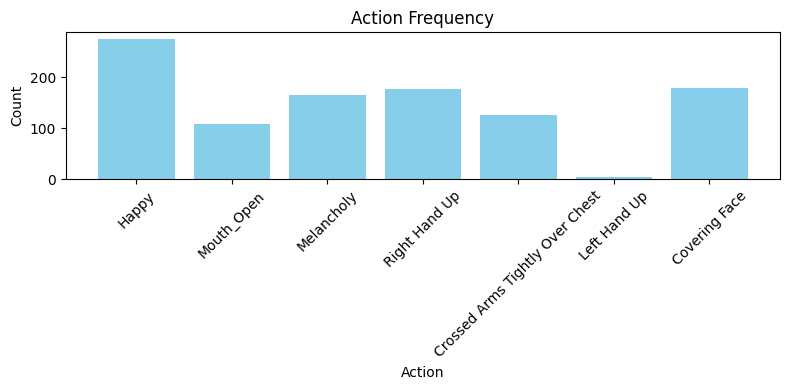

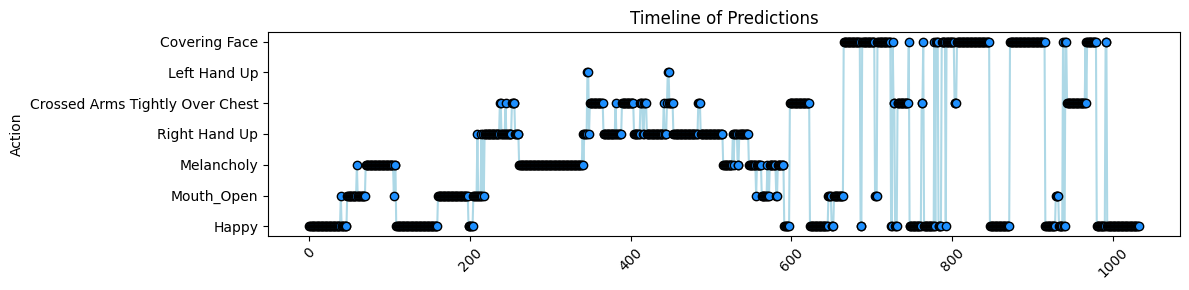

⚠️ No significant risk data to plot pie chart.


In [45]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from collections import Counter

# === Load model ===
model = joblib.load("Body_Tracking.pkl")  # Replace with your trained model path

# === Feature Names (2004) ===
feature_names = [f'{coord}{i}' for i in range(1, 2005) for coord in ['x', 'y', 'z', 'v']][:2004]

# === Action labels ===
label_map = {
    0: "standing_still",
    1: "covering_face",
    2: "right_hand_up",
    3: "left_hand_up",
    4: "crossed_arms",
    5: "fear_1",
    6: "happy",
    7: "melancholy",
    8: "calling_out"
}

# === Lost child score mapping ===
lost_weight = {
    "standing_still": 1,
    "covering_face": 2,
    "right_hand_up": 1,
    "left_hand_up": 1,
    "crossed_arms": 3,
    "fear_1": 3,
    "happy": 0,
    "melancholy": 2,
    "calling_out": 2
}

# === MediaPipe Setup ===
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

# === Styling ===
face_landmark_style = mp_drawing.DrawingSpec(color=(0, 150, 255), thickness=1, circle_radius=1)
face_connection_style = mp_drawing.DrawingSpec(color=(0, 90, 255), thickness=1, circle_radius=1)
pose_style = mp_drawing.DrawingSpec(color=(0, 120, 255), thickness=2, circle_radius=3)
pose_connection_style = mp_drawing.DrawingSpec(color=(0, 70, 230), thickness=2, circle_radius=2)
hand_style = mp_drawing.DrawingSpec(color=(0, 180, 255), thickness=2, circle_radius=2)
hand_connection_style = mp_drawing.DrawingSpec(color=(0, 130, 255), thickness=2, circle_radius=1)

# === Data Collection ===
prediction_history = []

# === Webcam Setup ===
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = holistic.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        overlay = image.copy()

        if results.face_landmarks:
            mp_drawing.draw_landmarks(overlay, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                                      face_landmark_style, face_connection_style)
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(overlay, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                      pose_style, pose_connection_style)

        image = cv2.addWeighted(image, 1.0, overlay, 0.65, 0)
        cv2.rectangle(image, (5, 5), (635, 475), (0, 190, 255), thickness=2)

        try:
            pose = results.pose_landmarks.landmark if results.pose_landmarks else []
            pose_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in pose]).flatten())
            face = results.face_landmarks.landmark if results.face_landmarks else []
            face_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in face]).flatten())
            row = pose_row + face_row
            row = row[:len(feature_names)]
            while len(row) < len(feature_names):
                row.append(0.0)

            X = pd.DataFrame([row], columns=feature_names)
            pred_class = model.predict(X)[0]
            label = label_map.get(pred_class, str(pred_class))
            prediction_history.append(label)

            label_bg = (0, 130, 255)
            cv2.rectangle(image, (10, 10), (10 + len(label)*20, 50), label_bg, -1)
            cv2.putText(image, label, (15, 40), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        except Exception as e:
            print("Prediction error:", e)

        cv2.imshow('AR Lost Child Behavior Detection', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# === Summary Charts ===
if prediction_history:
    counts = Counter(prediction_history)
    labels = list(counts.keys())
    values = list(counts.values())

    # Bar chart
    plt.figure(figsize=(8, 4))
    plt.bar(labels, values, color='skyblue')
    plt.title("Action Frequency")
    plt.xlabel("Action")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Timeline plot (with light blue points)
    plt.figure(figsize=(12, 3))
    plt.plot(
        prediction_history,
        marker='o',
        linestyle='-',
        color='#ADD8E6',              # Light blue line
        markerfacecolor='#1E90FF',    # Bright blue dots
        markeredgecolor='black'       # Black border for visibility
    )
    plt.title("Timeline of Predictions")
    plt.xticks(rotation=45)
    plt.ylabel("Action")
    plt.tight_layout()
    plt.show()

    try:
        # Pie chart (Lost Child Risk)
        risk_labels = []
        risk_scores = []
        for label, count in counts.items():
            weight = lost_weight.get(label, 0)
            risk_score = weight * count
            if risk_score > 0 and not np.isnan(risk_score):
                risk_labels.append(label)
                risk_scores.append(risk_score)

        if risk_scores:
            plt.figure(figsize=(6, 6))
            plt.pie(
                risk_scores,
                labels=risk_labels,
                autopct='%1.1f%%',
                startangle=140,
                colors=plt.cm.Blues(np.linspace(0.3, 0.9, len(risk_scores)))
            )
            plt.title("Lost Child Risk Distribution")
            plt.tight_layout()
            plt.show()
        else:
            print("⚠️ No significant risk data to plot pie chart.")

    except Exception as e:
        print("Pie chart error:", e)
else:
    print("No predictions made during session.")


Directional Tracking:

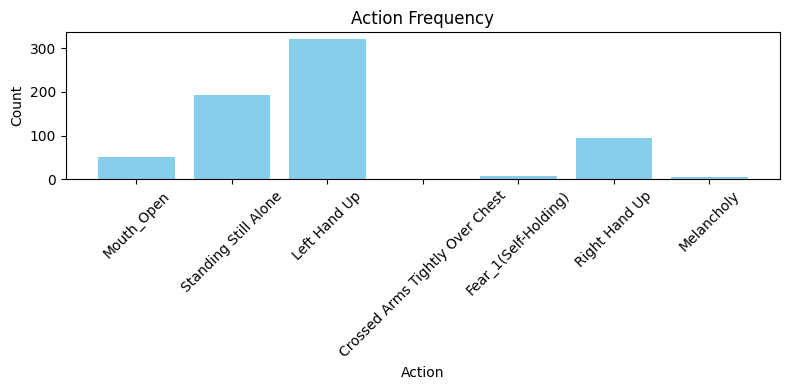

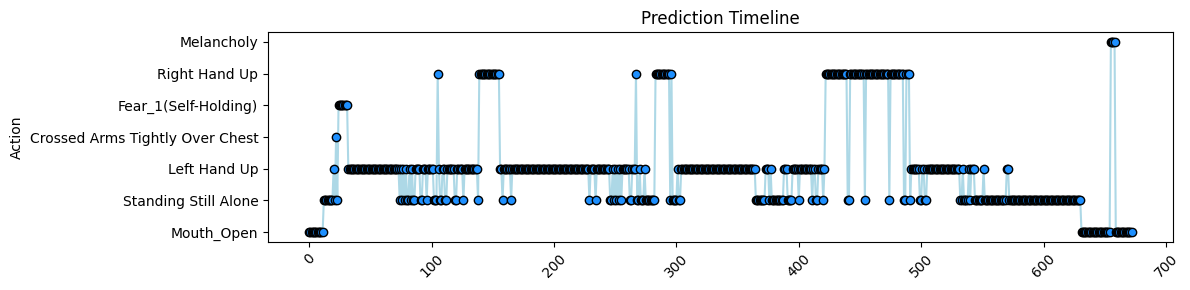

In [70]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from collections import Counter

# === Load model ===
model = joblib.load("Body_Tracking.pkl")

# === Feature Names ===
feature_names = [f'{coord}{i}' for i in range(1, 2005) for coord in ['x', 'y', 'z', 'v']][:2004]

# === Action labels ===
label_map = {
    0: "standing_still",
    1: "covering_face",
    2: "right_hand_up",
    3: "left_hand_up",
    4: "crossed_arms",
    5: "fear_1",
    6: "happy",
    7: "melancholy",
    8: "calling_out"
}

# === Risk Weights ===
lost_weight = {
    "standing_still": 1,
    "covering_face": 2,
    "right_hand_up": 1,
    "left_hand_up": 1,
    "crossed_arms": 3,
    "fear_1": 3,
    "happy": 0,
    "melancholy": 2,
    "calling_out": 2
}

# === MediaPipe Setup ===
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

# === Exact Styling from Code 1 ===
face_landmark_style = mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1)
face_connection_style = mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
pose_style = mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4)
pose_connection_style = mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
hand_style = mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4)
hand_connection_style = mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)

# === Prediction Log ===
prediction_history = []

# === Webcam Loop ===
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = holistic.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        overlay = image.copy()

        if results.face_landmarks:
            mp_drawing.draw_landmarks(overlay, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                                      face_landmark_style, face_connection_style)
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(overlay, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                      pose_style, pose_connection_style)

        image = cv2.addWeighted(image, 1.0, overlay, 0.65, 0)
        cv2.rectangle(image, (5, 5), (635, 475), (0, 190, 255), thickness=2)

        try:
            pose = results.pose_landmarks.landmark if results.pose_landmarks else []
            pose_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in pose]).flatten())
            face = results.face_landmarks.landmark if results.face_landmarks else []
            face_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in face]).flatten())
            row = pose_row + face_row
            row = row[:len(feature_names)]
            while len(row) < len(feature_names):
                row.append(0.0)

            X = pd.DataFrame([row], columns=feature_names)
            pred_class = model.predict(X)[0]
            label = label_map.get(pred_class, str(pred_class))
            prediction_history.append(label)

            label_bg = (245, 117, 16)
            cv2.rectangle(image, (10, 10), (10 + len(label)*20, 50), label_bg, -1)
            cv2.putText(image, label, (15, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        except Exception as e:
            print("Prediction error:", e)

        cv2.imshow('Behavior Detection Visuals', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# === Summary Charts ===
if prediction_history:
    counts = Counter(prediction_history)
    labels = list(counts.keys())
    values = list(counts.values())

    # Bar Chart
    plt.figure(figsize=(8, 4))
    plt.bar(labels, values, color='skyblue')
    plt.title("Action Frequency")
    plt.xlabel("Action")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Timeline Plot
    plt.figure(figsize=(12, 3))
    plt.plot(
        prediction_history,
        marker='o',
        linestyle='-',
        color='#ADD8E6',
        markerfacecolor='#1E90FF',
        markeredgecolor='black'
    )
    plt.title("Prediction Timeline")
    plt.xticks(rotation=45)
    plt.ylabel("Action")
    plt.tight_layout()
    plt.show()



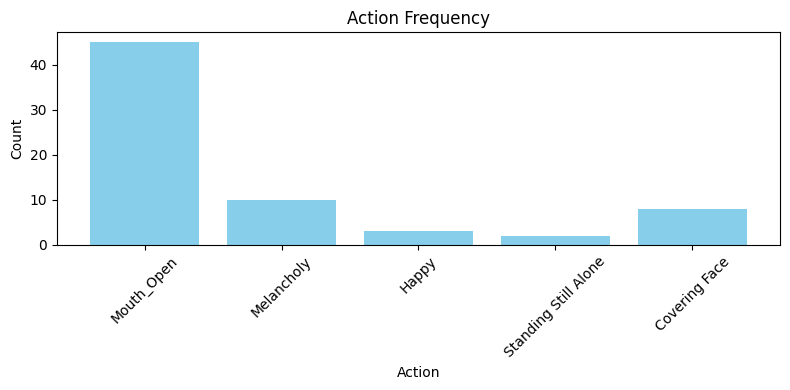

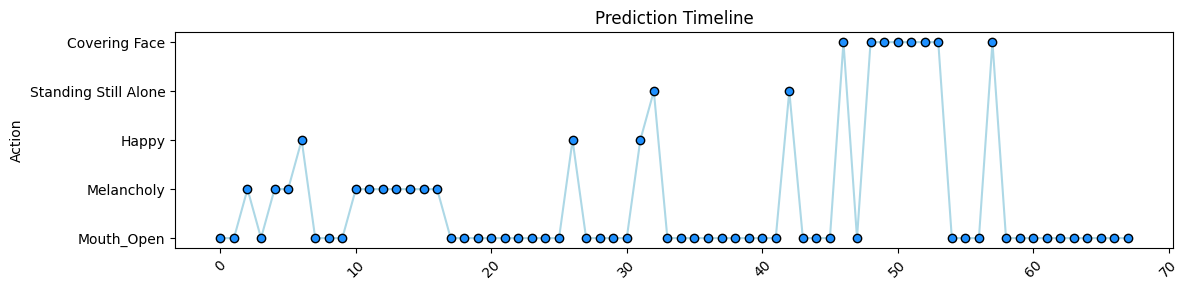

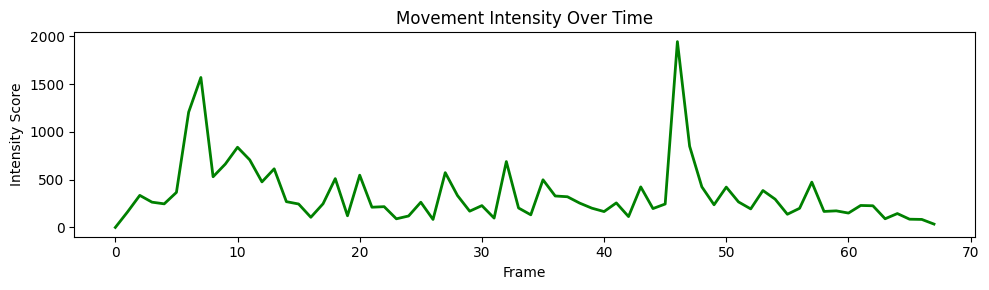

In [71]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from collections import Counter

# === Load model ===
model = joblib.load("Body_Tracking.pkl")

# === Feature Names ===
feature_names = [f'{coord}{i}' for i in range(1, 2005) for coord in ['x', 'y', 'z', 'v']][:2004]

# === Action labels ===
label_map = {
    0: "standing_still",
    1: "covering_face",
    2: "right_hand_up",
    3: "left_hand_up",
    4: "crossed_arms",
    5: "fear_1",
    6: "happy",
    7: "melancholy",
    8: "calling_out"
}

# === Risk Weights ===
lost_weight = {
    "standing_still": 1,
    "covering_face": 2,
    "right_hand_up": 1,
    "left_hand_up": 1,
    "crossed_arms": 3,
    "fear_1": 3,
    "happy": 0,
    "melancholy": 2,
    "calling_out": 2
}

# === MediaPipe Setup ===
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

# === Styling ===
face_landmark_style = mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1)
face_connection_style = mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
pose_style = mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4)
pose_connection_style = mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
hand_style = mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4)
hand_connection_style = mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)

# === Data Logs ===
prediction_history = []
movement_scores = []
previous_landmarks = None

# === Webcam Loop ===
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = holistic.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        overlay = image.copy()

        if results.face_landmarks:
            mp_drawing.draw_landmarks(overlay, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                                      face_landmark_style, face_connection_style)
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(overlay, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                      pose_style, pose_connection_style)

        image = cv2.addWeighted(image, 1.0, overlay, 0.65, 0)
        cv2.rectangle(image, (5, 5), (635, 475), (0, 190, 255), thickness=2)

        # === Movement Intensity Calculation ===
        movement_score = 0.0
        try:
            key_indices = [
                mp_holistic.PoseLandmark.LEFT_SHOULDER,
                mp_holistic.PoseLandmark.RIGHT_SHOULDER,
                mp_holistic.PoseLandmark.LEFT_ELBOW,
                mp_holistic.PoseLandmark.RIGHT_ELBOW,
                mp_holistic.PoseLandmark.LEFT_KNEE,
                mp_holistic.PoseLandmark.RIGHT_KNEE
            ]
            current_landmarks = [
                results.pose_landmarks.landmark[i] for i in key_indices
            ] if results.pose_landmarks else []

            if previous_landmarks and current_landmarks:
                distances = [
                    np.linalg.norm(np.array([c.x, c.y]) - np.array([p.x, p.y]))
                    for c, p in zip(current_landmarks, previous_landmarks)
                ]
                movement_score = round(sum(distances) * 1000, 2)

            previous_landmarks = current_landmarks
        except:
            pass

        movement_scores.append(movement_score)

        # Display Movement Score
        cv2.rectangle(image, (520, 10), (635, 50), (80, 110, 10), -1)
        cv2.putText(image, f'Move: {movement_score}', (530, 40),
                    cv2.FONT_HERSHEY_DUPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)

        # === Behavior Detection ===
        try:
            pose = results.pose_landmarks.landmark if results.pose_landmarks else []
            pose_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in pose]).flatten())
            face = results.face_landmarks.landmark if results.face_landmarks else []
            face_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in face]).flatten())
            row = pose_row + face_row
            row = row[:len(feature_names)]
            while len(row) < len(feature_names):
                row.append(0.0)

            X = pd.DataFrame([row], columns=feature_names)
            pred_class = model.predict(X)[0]
            label = label_map.get(pred_class, str(pred_class))
            prediction_history.append(label)

            label_bg = (245, 117, 16)
            cv2.rectangle(image, (10, 10), (10 + len(label)*20, 50), label_bg, -1)
            cv2.putText(image, label, (15, 40), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 2, cv2.LINE_AA)
        except Exception as e:
            print("Prediction error:", e)

        cv2.imshow('Behavior Detection Visuals', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# === Summary Charts ===
if prediction_history:
    counts = Counter(prediction_history)
    labels = list(counts.keys())
    values = list(counts.values())

    # Action Frequency Bar Chart
    plt.figure(figsize=(8, 4))
    plt.bar(labels, values, color='skyblue')
    plt.title("Action Frequency")
    plt.xlabel("Action")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Prediction Timeline
    plt.figure(figsize=(12, 3))
    plt.plot(prediction_history, marker='o', linestyle='-', color='#ADD8E6',
             markerfacecolor='#1E90FF', markeredgecolor='black')
    plt.title("Prediction Timeline")
    plt.xticks(rotation=45)
    plt.ylabel("Action")
    plt.tight_layout()
    plt.show()

    # NEW: Movement Intensity Timeline
    if movement_scores:
        plt.figure(figsize=(10, 3))
        plt.plot(movement_scores, color='green', linestyle='-', linewidth=2)
        plt.title("Movement Intensity Over Time")
        plt.xlabel("Frame")
        plt.ylabel("Intensity Score")
        plt.tight_layout()
        plt.show()

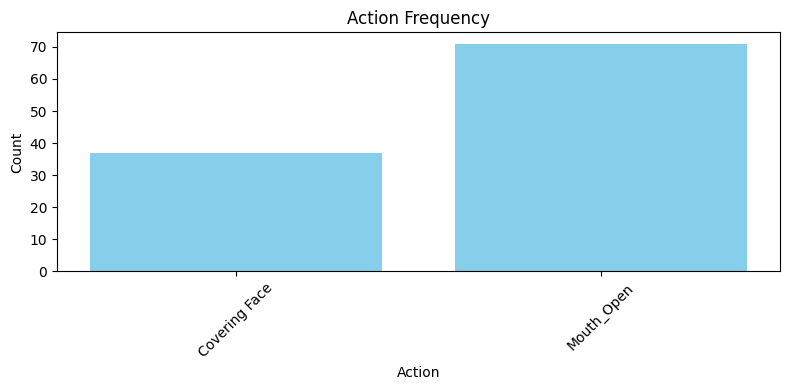

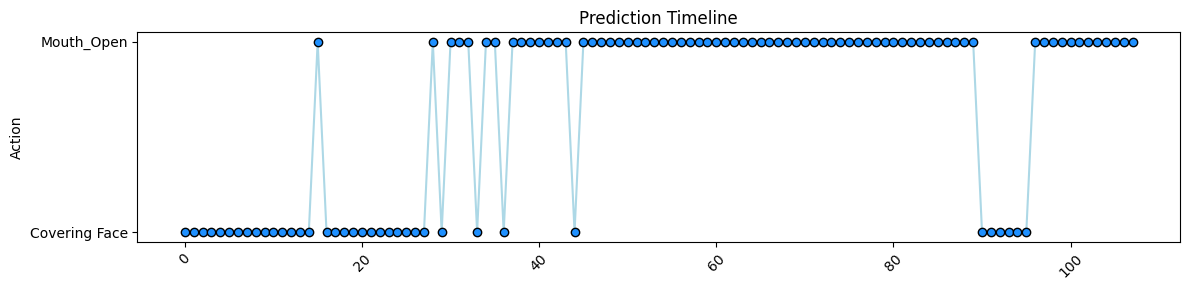

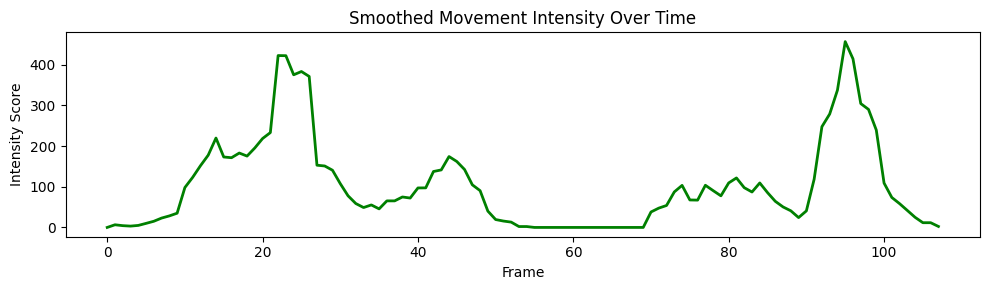

In [72]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from collections import Counter

# === Load model ===
model = joblib.load("Body_Tracking.pkl")

# === Feature Names ===
feature_names = [f'{coord}{i}' for i in range(1, 2005) for coord in ['x', 'y', 'z', 'v']][:2004]

# === Action labels ===
label_map = {
    0: "standing_still",
    1: "covering_face",
    2: "right_hand_up",
    3: "left_hand_up",
    4: "crossed_arms",
    5: "fear_1",
    6: "happy",
    7: "melancholy",
    8: "calling_out"
}

# === Risk Weights ===
lost_weight = {
    "standing_still": 1,
    "covering_face": 2,
    "right_hand_up": 1,
    "left_hand_up": 1,
    "crossed_arms": 3,
    "fear_1": 3,
    "happy": 0,
    "melancholy": 2,
    "calling_out": 2
}

# === MediaPipe Setup ===
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

# === Styling ===
face_landmark_style = mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1)
face_connection_style = mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
pose_style = mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4)
pose_connection_style = mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
hand_style = mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4)
hand_connection_style = mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)

# === Data Logs ===
prediction_history = []
movement_scores_raw = []
smoothed_scores = []
previous_landmarks = None
smoothing_window = 5

# === Webcam Loop ===
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = holistic.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        overlay = image.copy()

        if results.face_landmarks:
            mp_drawing.draw_landmarks(overlay, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                                      face_landmark_style, face_connection_style)
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(overlay, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                      pose_style, pose_connection_style)

        image = cv2.addWeighted(image, 1.0, overlay, 0.65, 0)
        cv2.rectangle(image, (5, 5), (635, 475), (0, 190, 255), thickness=2)

        # === Smarter Movement Intensity Calculation ===
        movement_score = 0.0
        try:
            key_indices = [
                mp_holistic.PoseLandmark.LEFT_SHOULDER,
                mp_holistic.PoseLandmark.RIGHT_SHOULDER,
                mp_holistic.PoseLandmark.LEFT_ELBOW,
                mp_holistic.PoseLandmark.RIGHT_ELBOW,
                mp_holistic.PoseLandmark.LEFT_KNEE,
                mp_holistic.PoseLandmark.RIGHT_KNEE
            ]
            current_landmarks = [
                results.pose_landmarks.landmark[i]
                for i in key_indices
                if results.pose_landmarks.landmark[i].visibility > 0.6
            ] if results.pose_landmarks else []

            if previous_landmarks and len(current_landmarks) == len(previous_landmarks):
                distances = [
                    np.linalg.norm(np.array([c.x, c.y]) - np.array([p.x, p.y]))
                    for c, p in zip(current_landmarks, previous_landmarks)
                ]
                distances = [d for d in distances if d > 0.01]
                movement_score = round(sum(distances) * 1000, 2)

            previous_landmarks = current_landmarks
        except:
            pass

        # Smoothing
        movement_scores_raw.append(movement_score)
        window = movement_scores_raw[-smoothing_window:]
        smoothed_value = round(np.mean(window), 2) if window else 0.0
        smoothed_scores.append(smoothed_value)

        # Display Smoothed Movement Score
        cv2.rectangle(image, (520, 10), (635, 50), (80, 110, 10), -1)
        cv2.putText(image, f'Move: {smoothed_value}', (530, 40),
                    cv2.FONT_HERSHEY_DUPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)

        # === Behavior Detection ===
        try:
            pose = results.pose_landmarks.landmark if results.pose_landmarks else []
            pose_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in pose]).flatten())
            face = results.face_landmarks.landmark if results.face_landmarks else []
            face_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in face]).flatten())
            row = pose_row + face_row
            row = row[:len(feature_names)]
            while len(row) < len(feature_names):
                row.append(0.0)

            X = pd.DataFrame([row], columns=feature_names)
            pred_class = model.predict(X)[0]
            label = label_map.get(pred_class, str(pred_class))
            prediction_history.append(label)

            label_bg = (245, 117, 16)
            cv2.rectangle(image, (10, 10), (10 + len(label)*20, 50), label_bg, -1)
            cv2.putText(image, label, (15, 40), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 2, cv2.LINE_AA)
        except Exception as e:
            print("Prediction error:", e)

        cv2.imshow('Behavior Detection Visuals', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# === Summary Charts ===
if prediction_history:
    counts = Counter(prediction_history)
    labels = list(counts.keys())
    values = list(counts.values())

    # Action Frequency Bar Chart
    plt.figure(figsize=(8, 4))
    plt.bar(labels, values, color='skyblue')
    plt.title("Action Frequency")
    plt.xlabel("Action")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Prediction Timeline
    plt.figure(figsize=(12, 3))
    plt.plot(prediction_history, marker='o', linestyle='-', color='#ADD8E6',
             markerfacecolor='#1E90FF', markeredgecolor='black')
    plt.title("Prediction Timeline")
    plt.xticks(rotation=45)
    plt.ylabel("Action")
    plt.tight_layout()
    plt.show()

    # Smoothed Movement Intensity Timeline
    if smoothed_scores:
        plt.figure(figsize=(10, 3))
        plt.plot(smoothed_scores, color='green', linewidth=2)
        plt.title("Smoothed Movement Intensity Over Time")
        plt.xlabel("Frame")
        plt.ylabel("Intensity Score")
        plt.tight_layout()
        plt.show()

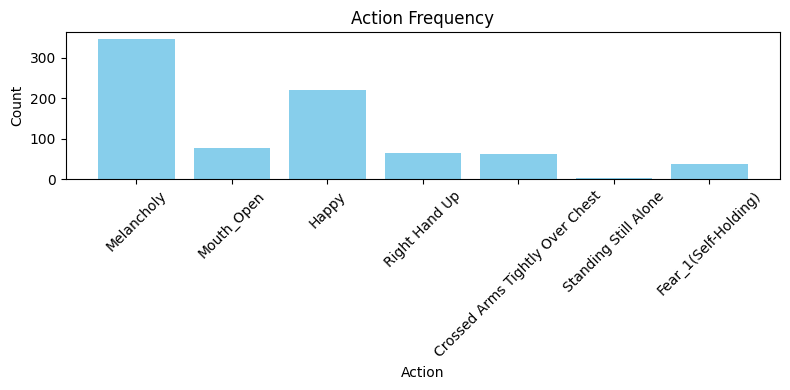

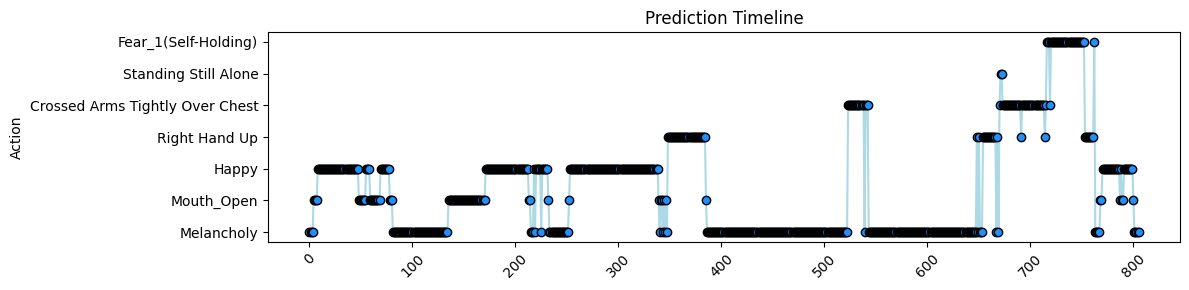

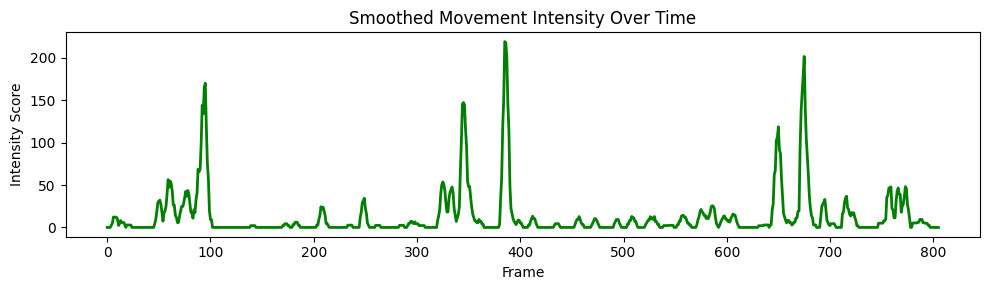

In [79]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from collections import Counter

# === Load model ===
model = joblib.load("Body_Tracking.pkl")

# === Feature Names ===
feature_names = [f'{coord}{i}' for i in range(1, 2005) for coord in ['x', 'y', 'z', 'v']][:2004]

# === Action labels ===
label_map = {
    0: "standing_still",
    1: "covering_face",
    2: "right_hand_up",
    3: "left_hand_up",
    4: "crossed_arms",
    5: "fear_1",
    6: "happy",
    7: "melancholy",
    8: "calling_out"
}

# === Risk Weights ===
lost_weight = {
    "standing_still": 1,
    "covering_face": 2,
    "right_hand_up": 1,
    "left_hand_up": 1,
    "crossed_arms": 3,
    "fear_1": 3,
    "happy": 0,
    "melancholy": 2,
    "calling_out": 2
}

# === MediaPipe Setup ===
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

# === Styling ===
face_landmark_style = mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1)
face_connection_style = mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
pose_style = mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4)
pose_connection_style = mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
hand_style = mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4)
hand_connection_style = mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)

# === Data Logs ===
prediction_history = []
movement_scores_raw = []
smoothed_scores = []
previous_landmarks = None
smoothing_window = 5

# === Webcam Loop ===
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = holistic.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        overlay = image.copy()

        if results.face_landmarks:
            mp_drawing.draw_landmarks(overlay, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                                      face_landmark_style, face_connection_style)
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(overlay, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                      pose_style, pose_connection_style)

        image = cv2.addWeighted(image, 1.0, overlay, 0.65, 0)
        cv2.rectangle(image, (5, 5), (635, 475), (0, 190, 255), thickness=2)

        # === Smarter Movement Intensity Calculation ===
        movement_score = 0.0
        try:
            key_indices = [
                mp_holistic.PoseLandmark.LEFT_SHOULDER,
                mp_holistic.PoseLandmark.RIGHT_SHOULDER,
                mp_holistic.PoseLandmark.LEFT_ELBOW,
                mp_holistic.PoseLandmark.RIGHT_ELBOW,
                mp_holistic.PoseLandmark.LEFT_KNEE,
                mp_holistic.PoseLandmark.RIGHT_KNEE
            ]
            current_landmarks = [
                results.pose_landmarks.landmark[i]
                for i in key_indices
                if results.pose_landmarks.landmark[i].visibility > 0.6
            ] if results.pose_landmarks else []

            if previous_landmarks and len(current_landmarks) == len(previous_landmarks):
                distances = [
                    np.linalg.norm(np.array([c.x, c.y]) - np.array([p.x, p.y]))
                    for c, p in zip(current_landmarks, previous_landmarks)
                ]
                distances = [d for d in distances if d > 0.01]
                movement_score = round(sum(distances) * 1000, 2)

            previous_landmarks = current_landmarks
        except:
            pass

        # Smoothing
        movement_scores_raw.append(movement_score)
        window = movement_scores_raw[-smoothing_window:]
        smoothed_value = round(np.mean(window), 2) if window else 0.0
        smoothed_scores.append(smoothed_value)

        # === Centered Movement Score Display ===
        score_text = f'Move: {smoothed_value}'
        (score_w, _) = cv2.getTextSize(score_text, cv2.FONT_HERSHEY_DUPLEX, 0.8, 2)[0]
        frame_center = image.shape[1] // 2
        box_x = frame_center - (score_w // 2) - 10
        box_y = 10

        cv2.rectangle(image, (box_x, box_y), (box_x + score_w + 20, box_y + 35), (80, 110, 10), -1)
        cv2.putText(image, score_text, (box_x + 10, box_y + 25),
                    cv2.FONT_HERSHEY_DUPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)

        # === Behavior Detection ===
        try:
            pose = results.pose_landmarks.landmark if results.pose_landmarks else []
            pose_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in pose]).flatten())
            face = results.face_landmarks.landmark if results.face_landmarks else []
            face_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in face]).flatten())
            row = pose_row + face_row
            row = row[:len(feature_names)]
            while len(row) < len(feature_names):
                row.append(0.0)

            X = pd.DataFrame([row], columns=feature_names)
            pred_class = model.predict(X)[0]
            label = label_map.get(pred_class, str(pred_class))
            prediction_history.append(label)

            label_bg = (245, 117, 16)
            cv2.rectangle(image, (10, 10), (10 + len(label)*20, 50), label_bg, -1)
            cv2.putText(image, label, (15, 40), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 2, cv2.LINE_AA)
        except Exception as e:
            print("Prediction error:", e)

        cv2.imshow('Behavior Detection Visuals', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# === Summary Charts ===
if prediction_history:
    counts = Counter(prediction_history)
    labels = list(counts.keys())
    values = list(counts.values())

    # Action Frequency Bar Chart
    plt.figure(figsize=(8, 4))
    plt.bar(labels, values, color='skyblue')
    plt.title("Action Frequency")
    plt.xlabel("Action")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Prediction Timeline
    plt.figure(figsize=(12, 3))
    plt.plot(prediction_history, marker='o', linestyle='-', color='#ADD8E6',
             markerfacecolor='#1E90FF', markeredgecolor='black')
    plt.title("Prediction Timeline")
    plt.xticks(rotation=45)
    plt.ylabel("Action")
    plt.tight_layout()
    plt.show()

    # Smoothed Movement Intensity Timeline
    if smoothed_scores:
        plt.figure(figsize=(10, 3))
        plt.plot(smoothed_scores, color='green', linewidth=2)
        plt.title("Smoothed Movement Intensity Over Time")
        plt.xlabel("Frame")
        plt.ylabel("Intensity Score")
        plt.tight_layout()
        plt.show()


In [89]:
!pip install plotly

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ----------- ---------------------------- 2.9/9.6 MB 18.6 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.6 MB 16.0 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 12.5 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.6 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 10.3 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- 

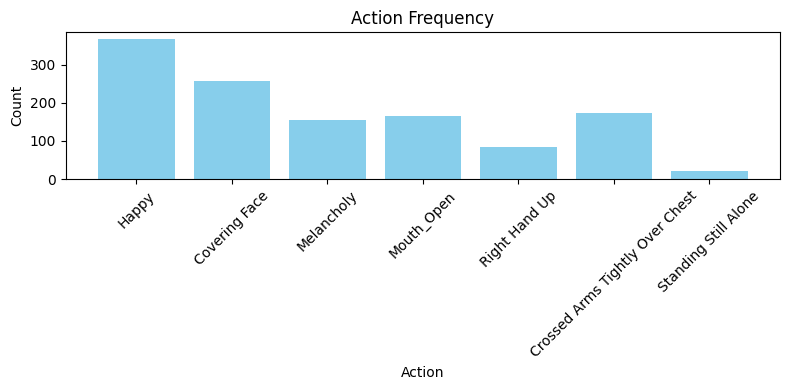

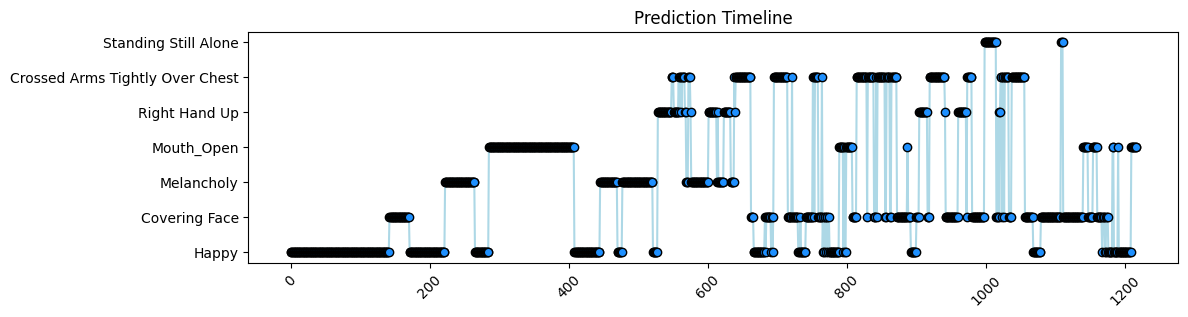

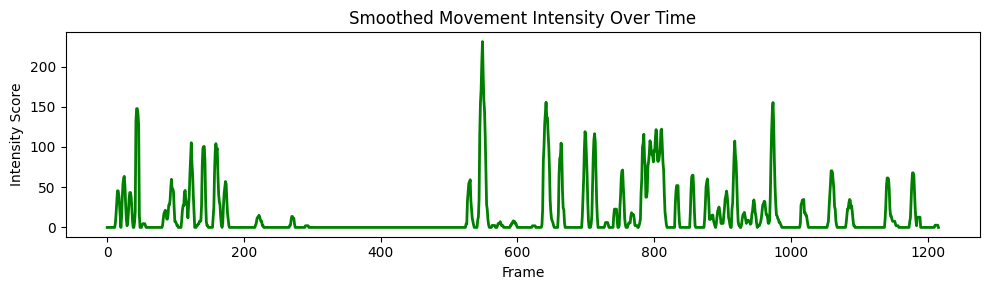

In [46]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from collections import Counter

# === Load model ===
model = joblib.load("Body_Tracking.pkl")

# === Feature Names ===
feature_names = [f'{coord}{i}' for i in range(1, 2005) for coord in ['x', 'y', 'z', 'v']][:2004]

# === Action labels ===
label_map = {
    0: "standing_still",
    1: "covering_face",
    2: "right_hand_up",
    3: "left_hand_up",
    4: "crossed_arms",
    5: "fear_1",
    6: "happy",
    7: "melancholy",
    8: "calling_out"
}

# === Risk Weights ===
lost_weight = {
    "standing_still": 1,
    "covering_face": 2,
    "right_hand_up": 1,
    "left_hand_up": 1,
    "crossed_arms": 3,
    "fear_1": 3,
    "happy": 0,
    "melancholy": 2,
    "calling_out": 2
}

# === MediaPipe Setup ===
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

# === Styling ===
face_landmark_style = mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1)
face_connection_style = mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
pose_style = mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4)
pose_connection_style = mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
hand_style = mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4)
hand_connection_style = mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)

# === Data Logs ===
prediction_history = []
movement_scores_raw = []
smoothed_scores = []
previous_landmarks = None
smoothing_window = 5
final_pose_landmarks = None
#NEW ADDITION
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_out = cv2.VideoWriter('pose_tracking_output.mp4', fourcc, 20.0, (640, 480))
# === Webcam Loop ===
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = holistic.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        overlay = image.copy()

        if results.face_landmarks:
            mp_drawing.draw_landmarks(overlay, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                                      face_landmark_style, face_connection_style)
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(overlay, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                      pose_style, pose_connection_style)
            final_pose_landmarks = results.pose_landmarks.landmark  # store final for 3D plot
#NEW ADDITION
        video_out.write(image)

        image = cv2.addWeighted(image, 1.0, overlay, 0.65, 0)
        cv2.rectangle(image, (5, 5), (635, 475), (0, 190, 255), thickness=2)

        # === Movement Intensity Calculation ===
        movement_score = 0.0
        try:
            key_indices = [
                mp_holistic.PoseLandmark.LEFT_SHOULDER,
                mp_holistic.PoseLandmark.RIGHT_SHOULDER,
                mp_holistic.PoseLandmark.LEFT_ELBOW,
                mp_holistic.PoseLandmark.RIGHT_ELBOW,
                mp_holistic.PoseLandmark.LEFT_KNEE,
                mp_holistic.PoseLandmark.RIGHT_KNEE
            ]
            current_landmarks = [
                results.pose_landmarks.landmark[i]
                for i in key_indices
                if results.pose_landmarks.landmark[i].visibility > 0.6
            ] if results.pose_landmarks else []

            if previous_landmarks and len(current_landmarks) == len(previous_landmarks):
                distances = [
                    np.linalg.norm(np.array([c.x, c.y]) - np.array([p.x, p.y]))
                    for c, p in zip(current_landmarks, previous_landmarks)
                ]
                distances = [d for d in distances if d > 0.01]
                movement_score = round(sum(distances) * 1000, 2)

            previous_landmarks = current_landmarks
        except:
            pass

        movement_scores_raw.append(movement_score)
        window = movement_scores_raw[-smoothing_window:]
        smoothed_value = round(np.mean(window), 2) if window else 0.0
        smoothed_scores.append(smoothed_value)

        score_text = f'Move: {smoothed_value}'
        (score_w, _) = cv2.getTextSize(score_text, cv2.FONT_HERSHEY_DUPLEX, 0.8, 2)[0]
        frame_center = image.shape[1] // 2
        box_x = frame_center - (score_w // 2) - 10
        box_y = 10

        cv2.rectangle(image, (box_x, box_y), (box_x + score_w + 20, box_y + 35), (80, 110, 10), -1)
        cv2.putText(image, score_text, (box_x + 10, box_y + 25),
                    cv2.FONT_HERSHEY_DUPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)

        # === Behavior Detection ===
        try:
            pose = results.pose_landmarks.landmark if results.pose_landmarks else []
            pose_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in pose]).flatten())
            face = results.face_landmarks.landmark if results.face_landmarks else []
            face_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in face]).flatten())
            row = pose_row + face_row
            row = row[:len(feature_names)]
            while len(row) < len(feature_names):
                row.append(0.0)

            X = pd.DataFrame([row], columns=feature_names)
            pred_class = model.predict(X)[0]
            label = label_map.get(pred_class, str(pred_class))
            prediction_history.append(label)

            label_bg = (245, 117, 16)
            cv2.rectangle(image, (10, 10), (10 + len(label)*20, 50), label_bg, -1)
            cv2.putText(image, label, (15, 40), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 2, cv2.LINE_AA)
        except Exception as e:
            print("Prediction error:", e)

        cv2.imshow('Behavior Detection Visuals', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# === Summary Charts ===
if prediction_history:
    counts = Counter(prediction_history)
    labels = list(counts.keys())
    values = list(counts.values())

    # Bar Chart
    plt.figure(figsize=(8, 4))
    plt.bar(labels, values, color='skyblue')
    plt.title("Action Frequency")
    plt.xlabel("Action")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Timeline Plot
    plt.figure(figsize=(12, 3))
    plt.plot(prediction_history, marker='o', linestyle='-', color='#ADD8E6',
             markerfacecolor='#1E90FF', markeredgecolor='black')
    plt.title("Prediction Timeline")
    plt.xticks(rotation=45)

      # Smoothed Movement Intensity Timeline
    if smoothed_scores:
        plt.figure(figsize=(10, 3))
        plt.plot(smoothed_scores, color='green', linewidth=2)
        plt.title("Smoothed Movement Intensity Over Time")
        plt.xlabel("Frame")
        plt.ylabel("Intensity Score")
        plt.tight_layout()
        plt.show()



In [74]:
import cv2
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score

# Load model
model = joblib.load('Body_Tracking.pkl')

# Placeholder: Load ground truth labels if you have them
ground_truth = []  # e.g., ['happy', 'fear_1', 'happy', ...]

# Live or video feed (replace with 0 for webcam or 'video.mp4' for file)
cap = cv2.VideoCapture('input_video.mp4')

# Prediction log
predicted = []

# Dummy landmark extraction function (replace with actual MediaPipe code)
def extract_landmarks(frame):
    # Replace with MediaPipe landmark vector (length 2004) per frame
    return [0.0] * 2004  # placeholder

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    landmarks = extract_landmarks(frame)
    if landmarks:  # If landmarks detected
        pred = model.predict([landmarks])[0]
        predicted.append(pred)

    # Optional: Display frame (comment out if not needed)
    # cv2.imshow('Live Inference', frame)
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

cap.release()
cv2.destroyAllWindows()

# 🎯 Compute accuracy
if ground_truth:
    real_time_accuracy = accuracy_score(ground_truth, predicted)
    print(f"✅ Real-Time Accuracy: {real_time_accuracy:.4f}")
else:
    print("⚠️ Ground truth not available — unable to compute exact real-time accuracy.")
    print("Collected predictions:", predicted[:10])

⚠️ Ground truth not available — unable to compute exact real-time accuracy.
Collected predictions: []


In [63]:
!pip install pyttsx3

In [65]:
import pyttsx3
engine = pyttsx3.init()
engine.say("Voice assistant activated. Wakandan tech ready")
engine.runAndWait()

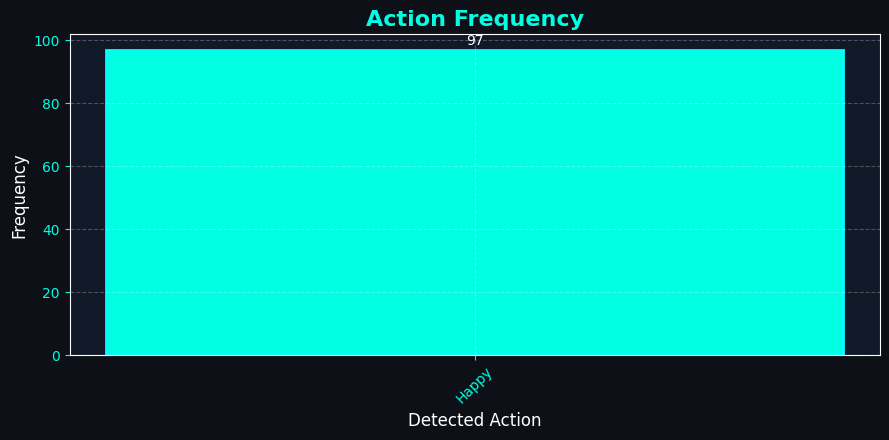

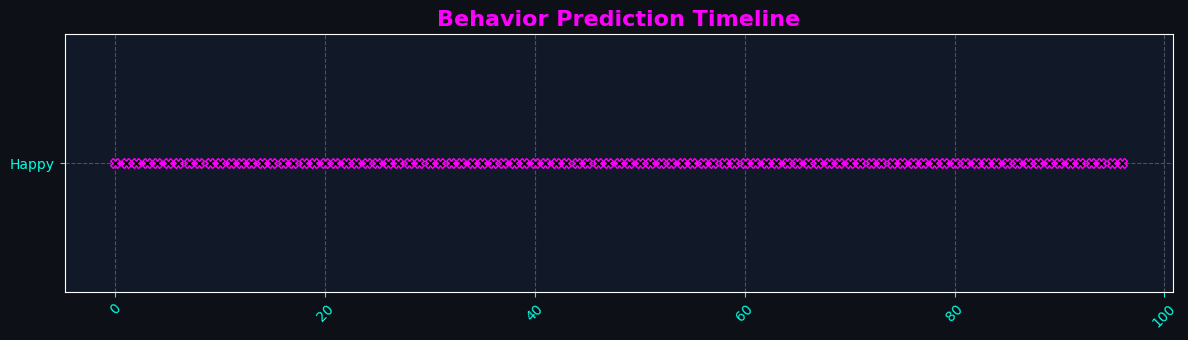

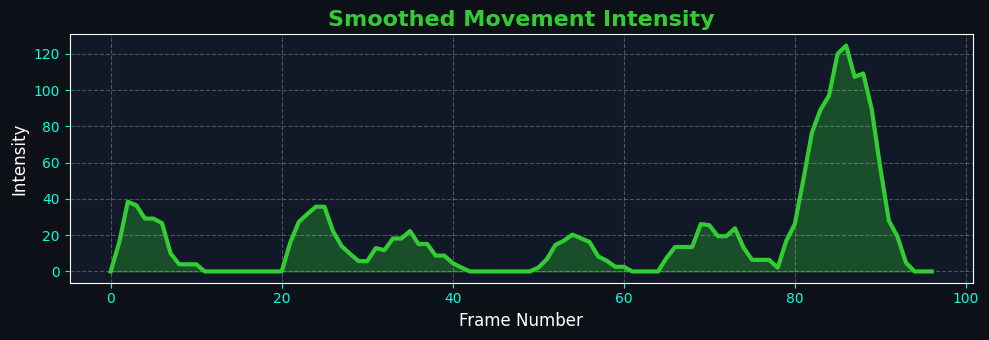

In [66]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib as mpl

# === Load ML Model ===
model = joblib.load("Body_Tracking.pkl")

# === Setup ===
feature_names = [f'{coord}{i}' for i in range(1, 2005) for coord in ['x', 'y', 'z', 'v']][:2004]
label_map = {
    0: "standing_still", 1: "covering_face", 2: "right_hand_up", 3: "left_hand_up",
    4: "crossed_arms", 5: "fear_1", 6: "happy", 7: "melancholy", 8: "calling_out"
}
lost_weight = {
    "standing_still": 1, "covering_face": 2, "right_hand_up": 1,
    "left_hand_up": 1, "crossed_arms": 3, "fear_1": 3,
    "happy": 0, "melancholy": 2, "calling_out": 2
}

# === MediaPipe Setup ===
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

# === Sci-Fi Styling ===
neon_cyan = (0, 255, 255)
neon_magenta = (255, 0, 255)
neon_green = (0, 255, 0)

face_landmark_style = mp_drawing.DrawingSpec(color=neon_cyan, thickness=1, circle_radius=2)
face_connection_style = mp_drawing.DrawingSpec(color=neon_magenta, thickness=1, circle_radius=1)
pose_style = mp_drawing.DrawingSpec(color=neon_green, thickness=3, circle_radius=4)
pose_connection_style = mp_drawing.DrawingSpec(color=(200, 0, 255), thickness=2, circle_radius=2)
hand_style = mp_drawing.DrawingSpec(color=neon_cyan, thickness=3, circle_radius=3)
hand_connection_style = mp_drawing.DrawingSpec(color=neon_magenta, thickness=2, circle_radius=2)

# === Data Storage ===
prediction_history, movement_scores_raw, smoothed_scores = [], [], []
previous_landmarks = None
smoothing_window = 5

# === Webcam Processing ===
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = holistic.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        overlay = image.copy()

        # === Landmark Drawing ===
        if results.face_landmarks:
            mp_drawing.draw_landmarks(overlay, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                                      face_landmark_style, face_connection_style)
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(overlay, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                      pose_style, pose_connection_style)

        image = cv2.addWeighted(image, 1.0, overlay, 0.65, 0)
        cv2.rectangle(image, (5, 5), (635, 475), (0, 190, 255), thickness=2)

        # === Movement Intensity ===
        movement_score = 0.0
        key_indices = [
            mp_holistic.PoseLandmark.LEFT_SHOULDER, mp_holistic.PoseLandmark.RIGHT_SHOULDER,
            mp_holistic.PoseLandmark.LEFT_ELBOW, mp_holistic.PoseLandmark.RIGHT_ELBOW,
            mp_holistic.PoseLandmark.LEFT_KNEE, mp_holistic.PoseLandmark.RIGHT_KNEE
        ]
        current_landmarks = [
            results.pose_landmarks.landmark[i]
            for i in key_indices
            if results.pose_landmarks.landmark[i].visibility > 0.6
        ] if results.pose_landmarks else []

        if previous_landmarks and len(current_landmarks) == len(previous_landmarks):
            distances = [
                np.linalg.norm(np.array([c.x, c.y]) - np.array([p.x, p.y]))
                for c, p in zip(current_landmarks, previous_landmarks)
            ]
            distances = [d for d in distances if d > 0.01]
            movement_score = round(sum(distances) * 1000, 2)

        previous_landmarks = current_landmarks
        movement_scores_raw.append(movement_score)
        window = movement_scores_raw[-smoothing_window:]
        smoothed_value = round(np.mean(window), 2) if window else 0.0
        smoothed_scores.append(smoothed_value)

        # === Prediction ===
        try:
            pose = results.pose_landmarks.landmark if results.pose_landmarks else []
            pose_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in pose]).flatten())
            face = results.face_landmarks.landmark if results.face_landmarks else []
            face_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in face]).flatten())
            row = pose_row + face_row
            row = row[:len(feature_names)]
            while len(row) < len(feature_names):
                row.append(0.0)

            X = pd.DataFrame([row], columns=feature_names)
            pred_class = model.predict(X)[0]
            label = label_map.get(pred_class, str(pred_class))
            prediction_history.append(label)

            label_bg = (245, 117, 16)
            cv2.rectangle(image, (10, 10), (10 + len(label)*20, 50), label_bg, -1)
            cv2.putText(image, label, (15, 40), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 2, cv2.LINE_AA)
        except Exception as e:
            print("Prediction error:", e)

        cv2.imshow('🧠 Sci-Fi Behavior Detection HUD', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# === Futuristic Plotting Section ===
plt.style.use('dark_background')
mpl.rcParams['axes.edgecolor'] = 'white'
mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['xtick.color'] = '#00FFE3'
mpl.rcParams['ytick.color'] = '#00FFE3'
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['figure.facecolor'] = '#0D1117'
mpl.rcParams['axes.facecolor'] = '#111827'

if prediction_history:
    counts = Counter(prediction_history)
    labels = list(counts.keys())
    values = list(counts.values())

    # Bar Chart
    plt.figure(figsize=(9, 4.5))
    bars = plt.bar(labels, values, color='#00FFE3', edgecolor='cyan', linewidth=2)
    plt.title("Action Frequency", fontsize=16, fontweight='bold', color='#00FFE3')
    plt.xlabel("Detected Action", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.25)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.5, str(height),
                 ha='center', va='bottom', fontsize=10, color='white')
    plt.tight_layout()
    plt.show()

    # Timeline Plot
    plt.figure(figsize=(12, 3.5))
    plt.plot(prediction_history, marker='X', markersize=7, linestyle='--', linewidth=2.5,
             color='#FF00FF', markerfacecolor='black', markeredgecolor='#FF00FF')
    plt.title("Behavior Prediction Timeline", fontsize=16, fontweight='bold', color='#FF00FF')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.25)
    plt.tight_layout()
    plt.show()

    # Smoothed Movement Intensity
    if smoothed_scores:
        x_vals = range(len(smoothed_scores))
        plt.figure(figsize=(10, 3.5))
        plt.plot(x_vals, smoothed_scores, color='#32CD32', linewidth=3)
        plt.fill_between(x_vals, smoothed_scores, alpha=0.3, color='#32CD32')
        plt.title("Smoothed Movement Intensity", fontsize=16, fontweight='bold', color='#32CD32')
        plt.xlabel("Frame Number", fontsize=12)
        plt.ylabel("Intensity", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.25)
        plt.tight_layout()
        plt.show()

In [96]:
!pip install gTTS

In [98]:
speak("Hello commander. The system analyzed over 200 behavioral snapshots, detected significant movement flow, and is now preparing graphical diagnostics for review. Please stand by.")

In [105]:
# Install all required packages inside the notebook
!pip install gTTS playsound==1.2.2 matplotlib numpy pandas --quiet

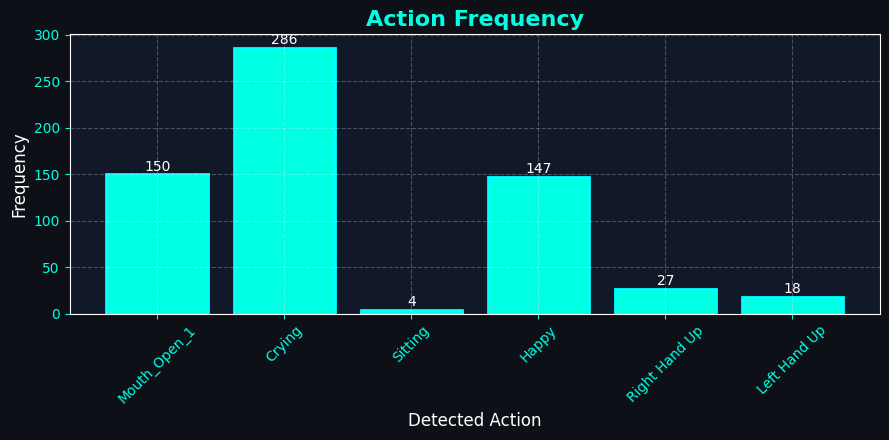

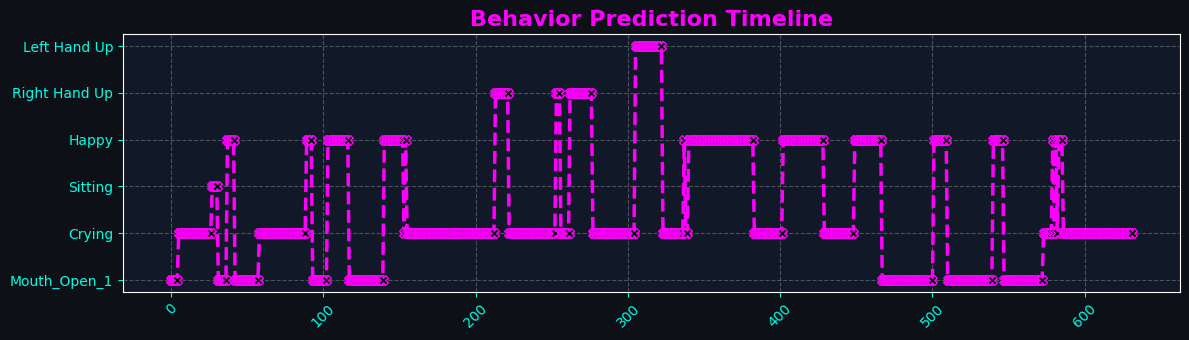

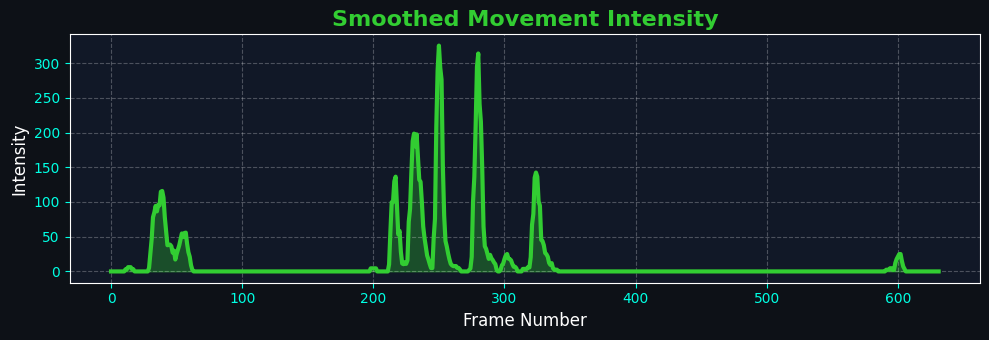

PermissionError: [Errno 13] Permission denied: 'final_report.mp3'

In [54]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib as mpl

# === Load ML Model ===
model = joblib.load("Body_Tracking.pkl")

# === Setup ===
feature_names = [f'{coord}{i}' for i in range(1, 2005) for coord in ['x', 'y', 'z', 'v']][:2004]
label_map = {
    0: "standing_still", 1: "covering_face", 2: "right_hand_up", 3: "left_hand_up",
    4: "crossed_arms", 5: "fear_1", 6: "happy", 7: "melancholy", 8: "calling_out"
}
lost_weight = {
    "standing_still": 1, "covering_face": 2, "right_hand_up": 1,
    "left_hand_up": 1, "crossed_arms": 3, "fear_1": 3,
    "happy": 0, "melancholy": 2, "calling_out": 2
}

# === MediaPipe Setup ===
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

# === Sci-Fi Styling ===
neon_cyan = (0, 255, 255)
neon_magenta = (255, 0, 255)
neon_green = (0, 255, 0)

face_landmark_style = mp_drawing.DrawingSpec(color=neon_cyan, thickness=1, circle_radius=2)
face_connection_style = mp_drawing.DrawingSpec(color=neon_magenta, thickness=1, circle_radius=1)
pose_style = mp_drawing.DrawingSpec(color=neon_green, thickness=3, circle_radius=4)
pose_connection_style = mp_drawing.DrawingSpec(color=(200, 0, 255), thickness=2, circle_radius=2)
hand_style = mp_drawing.DrawingSpec(color=neon_cyan, thickness=3, circle_radius=3)
hand_connection_style = mp_drawing.DrawingSpec(color=neon_magenta, thickness=2, circle_radius=2)

# === Data Storage ===
prediction_history, movement_scores_raw, smoothed_scores = [], [], []
previous_landmarks = None
smoothing_window = 5

# === Webcam Processing ===
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = holistic.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        overlay = image.copy()

        # === Landmark Drawing ===
        if results.face_landmarks:
            mp_drawing.draw_landmarks(overlay, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                                      face_landmark_style, face_connection_style)
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(overlay, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                      pose_style, pose_connection_style)

        image = cv2.addWeighted(image, 1.0, overlay, 0.65, 0)
        cv2.rectangle(image, (5, 5), (635, 475), (0, 190, 255), thickness=2)

        # === Movement Intensity ===
        movement_score = 0.0
        key_indices = [
            mp_holistic.PoseLandmark.LEFT_SHOULDER, mp_holistic.PoseLandmark.RIGHT_SHOULDER,
            mp_holistic.PoseLandmark.LEFT_ELBOW, mp_holistic.PoseLandmark.RIGHT_ELBOW,
            mp_holistic.PoseLandmark.LEFT_KNEE, mp_holistic.PoseLandmark.RIGHT_KNEE
        ]
        current_landmarks = [
            results.pose_landmarks.landmark[i]
            for i in key_indices
            if results.pose_landmarks.landmark[i].visibility > 0.6
        ] if results.pose_landmarks else []

        if previous_landmarks and len(current_landmarks) == len(previous_landmarks):
            distances = [
                np.linalg.norm(np.array([c.x, c.y]) - np.array([p.x, p.y]))
                for c, p in zip(current_landmarks, previous_landmarks)
            ]
            distances = [d for d in distances if d > 0.01]
            movement_score = round(sum(distances) * 1000, 2)

        previous_landmarks = current_landmarks
        movement_scores_raw.append(movement_score)
        window = movement_scores_raw[-smoothing_window:]
        smoothed_value = round(np.mean(window), 2) if window else 0.0
        smoothed_scores.append(smoothed_value)

        # === Prediction ===
        try:
            pose = results.pose_landmarks.landmark if results.pose_landmarks else []
            pose_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in pose]).flatten())
            face = results.face_landmarks.landmark if results.face_landmarks else []
            face_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in face]).flatten())
            row = pose_row + face_row
            row = row[:len(feature_names)]
            while len(row) < len(feature_names):
                row.append(0.0)

            X = pd.DataFrame([row], columns=feature_names)
            pred_class = model.predict(X)[0]
            label = label_map.get(pred_class, str(pred_class))
            prediction_history.append(label)

            label_bg = (245, 117, 16)
            cv2.rectangle(image, (10, 10), (10 + len(label)*20, 50), label_bg, -1)
            cv2.putText(image, label, (15, 40), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 2, cv2.LINE_AA)
        except Exception as e:
            print("Prediction error:", e)

        cv2.imshow('🧠 Sci-Fi Behavior Detection HUD', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# === Futuristic Plotting Section ===
plt.style.use('dark_background')
mpl.rcParams['axes.edgecolor'] = 'white'
mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['xtick.color'] = '#00FFE3'
mpl.rcParams['ytick.color'] = '#00FFE3'
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['figure.facecolor'] = '#0D1117'
mpl.rcParams['axes.facecolor'] = '#111827'

if prediction_history:
    counts = Counter(prediction_history)
    labels = list(counts.keys())
    values = list(counts.values())

    # Bar Chart
    plt.figure(figsize=(9, 4.5))
    bars = plt.bar(labels, values, color='#00FFE3', edgecolor='cyan', linewidth=2)
    plt.title("Action Frequency", fontsize=16, fontweight='bold', color='#00FFE3')
    plt.xlabel("Detected Action", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.25)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.5, str(height),
                 ha='center', va='bottom', fontsize=10, color='white')
    plt.tight_layout()
    plt.show()

    # Timeline Plot
    plt.figure(figsize=(12, 3.5))
    plt.plot(prediction_history, marker='X', markersize=7, linestyle='--', linewidth=2.5,
             color='#FF00FF', markerfacecolor='black', markeredgecolor='#FF00FF')
    plt.title("Behavior Prediction Timeline", fontsize=16, fontweight='bold', color='#FF00FF')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.25)
    plt.tight_layout()
    plt.show()

    # Smoothed Movement Intensity
    if smoothed_scores:
        x_vals = range(len(smoothed_scores))
        plt.figure(figsize=(10, 3.5))
        plt.plot(x_vals, smoothed_scores, color='#32CD32', linewidth=3)
        plt.fill_between(x_vals, smoothed_scores, alpha=0.3, color='#32CD32')
        plt.title("Smoothed Movement Intensity", fontsize=16, fontweight='bold', color='#32CD32')
        plt.xlabel("Frame Number", fontsize=12)
        plt.ylabel("Intensity", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.25)
        plt.tight_layout()
        plt.show()

        # === Voice Summary after Graphs ===
from gtts import gTTS
from playsound import playsound

if prediction_history and smoothed_scores:
    counts = Counter(prediction_history)
    most_frequent = max(counts, key=counts.get)
    avg_intensity = np.mean(smoothed_scores)

    voice_message = (
        f"Hello commander. The system analyzed {len(prediction_history)} behavioral snapshots. "
        f"The most frequent behavior was '{most_frequent}'. "
        f"The average movement intensity was {avg_intensity:.2f} units. "
        f"Graphical diagnostics completed successfully. Awaiting further command."
    )

    tts = gTTS(text=voice_message, lang='en')
    tts.save("final_report.mp3")
    print("\n🎙️ Narrating Analysis Report...")
    playsound("final_report.mp3")

In [55]:
# Install required libraries
!pip install gTTS playsound==1.2.2 matplotlib numpy pandas mediapipe joblib --quiet

In [52]:
#MODEL_FINAL .........................................................................

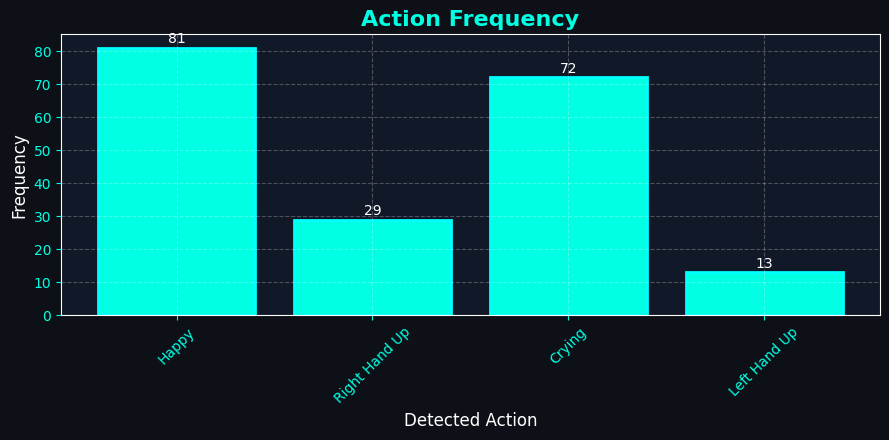

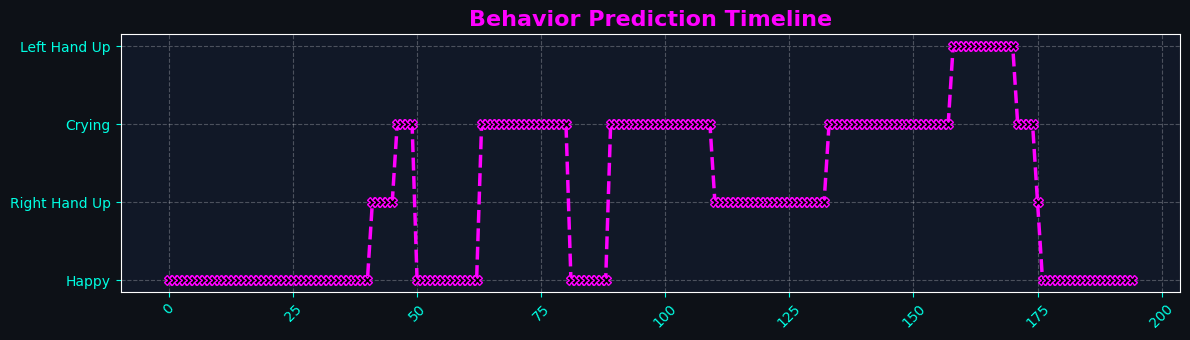

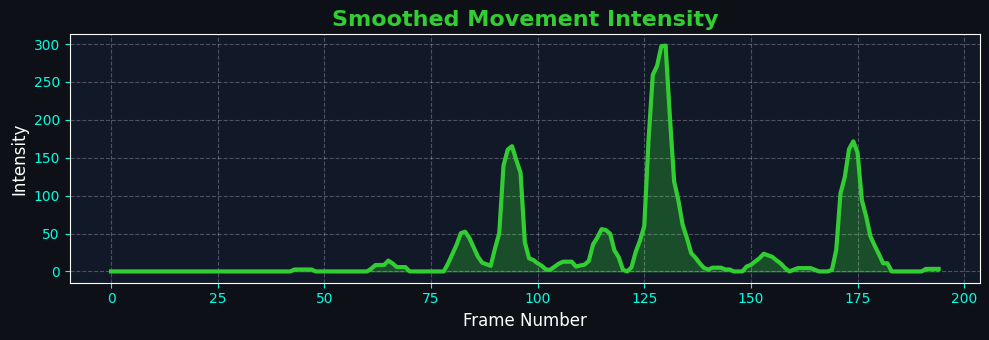


🎙️ Narrating Analysis Report...


In [76]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib as mpl
import os
import tempfile
from gtts import gTTS
from playsound import playsound

# === Load ML Model ===
model = joblib.load("Body_Tracking.pkl")

# === Setup ===
feature_names = [f'{coord}{i}' for i in range(1, 2005) for coord in ['x', 'y', 'z', 'v']][:2004]
label_map = {
    0: "standing_still", 1: "covering_face", 2: "right_hand_up", 3: "left_hand_up",
    4: "crossed_arms", 5: "fear_1", 6: "happy", 7: "melancholy", 8: "calling_out"
}

# === MediaPipe Setup ===
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

# === Sci-Fi Styling ===
neon_cyan = (0, 255, 255)
neon_magenta = (255, 0, 255)
neon_green = (0, 255, 0)

face_landmark_style = mp_drawing.DrawingSpec(color=neon_cyan, thickness=1, circle_radius=2)
face_connection_style = mp_drawing.DrawingSpec(color=neon_magenta, thickness=1, circle_radius=1)
pose_style = mp_drawing.DrawingSpec(color=neon_green, thickness=3, circle_radius=4)
pose_connection_style = mp_drawing.DrawingSpec(color=(200, 0, 255), thickness=2, circle_radius=2)
hand_style = mp_drawing.DrawingSpec(color=neon_cyan, thickness=3, circle_radius=3)
hand_connection_style = mp_drawing.DrawingSpec(color=neon_magenta, thickness=2, circle_radius=2)

# === Data Storage ===
prediction_history, movement_scores_raw, smoothed_scores = [], [], []
previous_landmarks = None
smoothing_window = 5

# === Webcam Processing ===
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = holistic.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        overlay = image.copy()

        # Draw landmarks
        if results.face_landmarks:
            mp_drawing.draw_landmarks(overlay, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                                      face_landmark_style, face_connection_style)
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(overlay, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                      pose_style, pose_connection_style)

        image = cv2.addWeighted(image, 1.0, overlay, 0.65, 0)
        cv2.rectangle(image, (5, 5), (635, 475), (0, 190, 255), thickness=2)

        # Movement Intensity
        movement_score = 0.0
        key_indices = [
            mp_holistic.PoseLandmark.LEFT_SHOULDER, mp_holistic.PoseLandmark.RIGHT_SHOULDER,
            mp_holistic.PoseLandmark.LEFT_ELBOW, mp_holistic.PoseLandmark.RIGHT_ELBOW,
            mp_holistic.PoseLandmark.LEFT_KNEE, mp_holistic.PoseLandmark.RIGHT_KNEE
        ]
        current_landmarks = [
            results.pose_landmarks.landmark[i]
            for i in key_indices
            if results.pose_landmarks.landmark[i].visibility > 0.6
        ] if results.pose_landmarks else []

        if previous_landmarks and len(current_landmarks) == len(previous_landmarks):
            distances = [
                np.linalg.norm(np.array([c.x, c.y]) - np.array([p.x, p.y]))
                for c, p in zip(current_landmarks, previous_landmarks)
            ]
            distances = [d for d in distances if d > 0.01]
            movement_score = round(sum(distances) * 1000, 2)

        previous_landmarks = current_landmarks
        movement_scores_raw.append(movement_score)
        window = movement_scores_raw[-smoothing_window:]
        smoothed_value = round(np.mean(window), 2) if window else 0.0
        smoothed_scores.append(smoothed_value)

        # Behavior Prediction
        try:
            pose = results.pose_landmarks.landmark if results.pose_landmarks else []
            pose_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in pose]).flatten())
            face = results.face_landmarks.landmark if results.face_landmarks else []
            face_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in face]).flatten())
            row = pose_row + face_row
            row = row[:len(feature_names)]
            while len(row) < len(feature_names):
                row.append(0.0)

            X = pd.DataFrame([row], columns=feature_names)
            pred_class = model.predict(X)[0]
            label = label_map.get(pred_class, str(pred_class))
            prediction_history.append(label)

            label_bg = (245, 117, 16)
            cv2.rectangle(image, (10, 10), (10 + len(label)*20, 50), label_bg, -1)
            cv2.putText(image, label, (15, 40), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 2, cv2.LINE_AA)
        except Exception as e:
            print("Prediction error:", e)

        cv2.imshow('🧠 Sci-Fi Behavior Detection HUD', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# === Graphical Diagnostics ===
plt.style.use('dark_background')
mpl.rcParams['axes.edgecolor'] = 'white'
mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['xtick.color'] = '#00FFE3'
mpl.rcParams['ytick.color'] = '#00FFE3'
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['figure.facecolor'] = '#0D1117'
mpl.rcParams['axes.facecolor'] = '#111827'

if prediction_history:
    counts = Counter(prediction_history)
    labels = list(counts.keys())
    values = list(counts.values())

    plt.figure(figsize=(9, 4.5))
    bars = plt.bar(labels, values, color='#00FFE3', edgecolor='cyan', linewidth=2)
    plt.title("Action Frequency", fontsize=16, fontweight='bold', color='#00FFE3')
    plt.xlabel("Detected Action", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.25)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.5, str(height),
                 ha='center', va='bottom', fontsize=10, color='white')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 3.5))
    plt.plot(prediction_history, marker='X', markersize=7, linestyle='--', linewidth=2.5,
             color='#FF00FF', markerfacecolor='black', markeredgecolor='#FF00FF')
    plt.title("Behavior Prediction Timeline", fontsize=16, fontweight='bold', color='#FF00FF')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.25)
    plt.tight_layout()
    plt.show()

    if smoothed_scores:
        x_vals = range(len(smoothed_scores))
        plt.figure(figsize=(10, 3.5))
        plt.plot(x_vals, smoothed_scores, color='#32CD32', linewidth=3)
        plt.fill_between(x_vals, smoothed_scores, alpha=0.3, color='#32CD32')
        plt.title("Smoothed Movement Intensity", fontsize=16, fontweight='bold', color='#32CD32')
        plt.xlabel("Frame Number", fontsize=12)
        plt.ylabel("Intensity", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.25)
        plt.tight_layout()
        plt.show()

   # === Voice Summary with File-Safe Path ===
import os, uuid
from gtts import gTTS
from playsound import playsound

# Make sure the output folder exists
os.makedirs("audio_output", exist_ok=True)

# Create a unique filename to avoid permission conflicts
filename = f"final_report_{uuid.uuid4().hex}.mp3"
safe_path = os.path.join("audio_output", filename)

# Prepare the analysis summary
counts = Counter(prediction_history)
most_frequent = max(counts, key=counts.get)
avg_intensity = np.mean(smoothed_scores)
peak_intensity = max(smoothed_scores)
peak_index = smoothed_scores.index(peak_intensity)
range_start = max(0, peak_index - 5)
range_end = min(len(smoothed_scores) - 1, peak_index + 5)
frame_range = f"between frames {range_start} and {range_end}"

voice_message = (
    f"Hello commander Your Voice Assistant Here The system analyzed {len(prediction_history)} behavioral snapshots in total. "
    f"The most frequent behavior which was observed was'{most_frequent}'. "
    f"The average movement intensity was {avg_intensity:.2f} units. "
    f"The highest movement intensity, recorded at {peak_intensity:.2f} units, occurred {frame_range}."
    f"Graphical diagnostics completed successfully. Awaiting further command."
)

# Generate and play the voice
tts = gTTS(text=voice_message, lang='en')
tts.save(safe_path)
print("\n🎙️ Narrating Analysis Report...")
playsound(safe_path)

In [123]:
!pip install ipywidgets --quiet

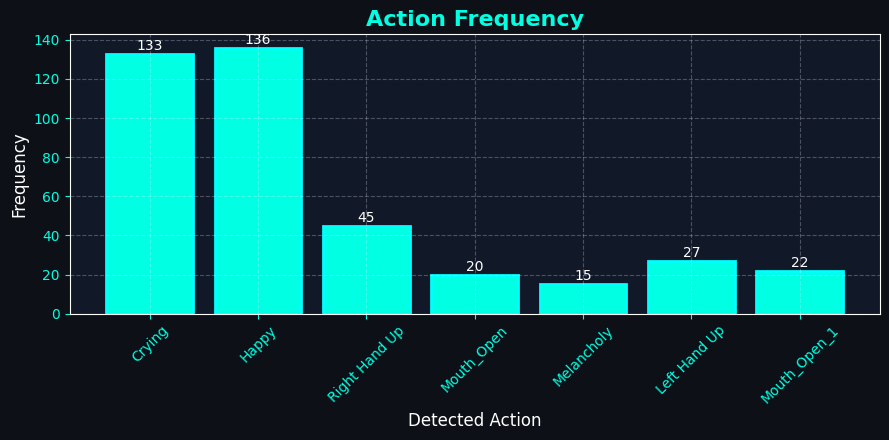

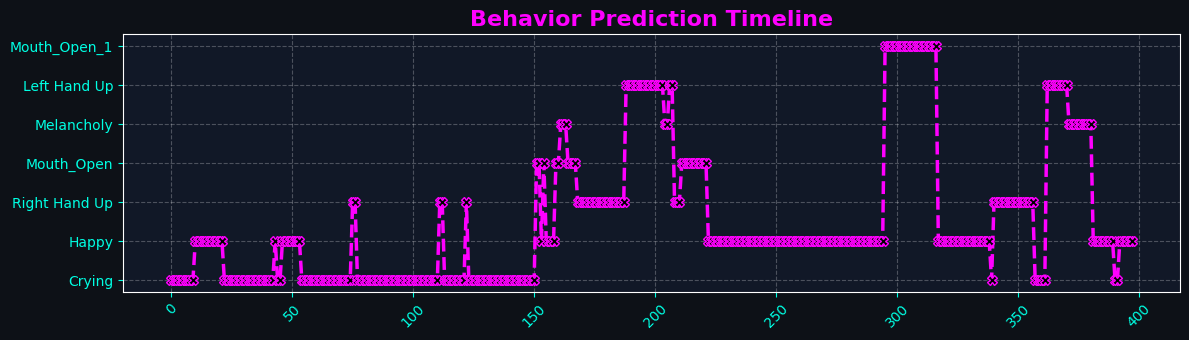

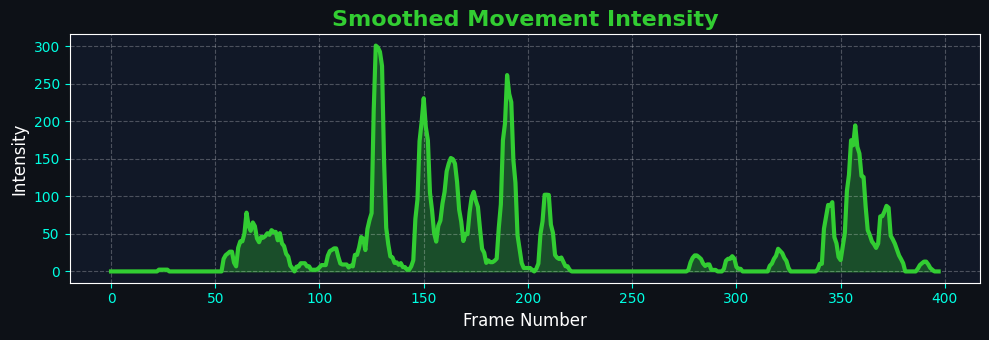


Narrating Analysis Report...


Button(description='Replay Voice Report', style=ButtonStyle())

In [49]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib as mpl
import os
import tempfile
from gtts import gTTS
from playsound import playsound

# === Loading my ML Model ===
model = joblib.load("Body_Tracking.pkl")

# === Setting up features===
feature_names = [f'{coord}{i}' for i in range(1, 2005) for coord in ['x', 'y', 'z', 'v']][:2004]
label_map = {
    0: "standing_still", 1: "covering_face", 2: "right_hand_up", 3: "left_hand_up",
    4: "crossed_arms", 5: "fear_1", 6: "happy", 7: "melancholy", 8: "calling_out"
}

# === MediaPipe Setup ===
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

# ===  Styling ===
neon_cyan = (0, 255, 255)
neon_magenta = (255, 0, 255)
neon_green = (0, 255, 0)

face_landmark_style = mp_drawing.DrawingSpec(color=neon_cyan, thickness=1, circle_radius=2)
face_connection_style = mp_drawing.DrawingSpec(color=neon_magenta, thickness=1, circle_radius=1)
pose_style = mp_drawing.DrawingSpec(color=neon_green, thickness=3, circle_radius=4)
pose_connection_style = mp_drawing.DrawingSpec(color=(200, 0, 255), thickness=2, circle_radius=2)
hand_style = mp_drawing.DrawingSpec(color=neon_cyan, thickness=3, circle_radius=3)
hand_connection_style = mp_drawing.DrawingSpec(color=neon_magenta, thickness=2, circle_radius=2)

# === Data Storage ===
prediction_history, movement_scores_raw, smoothed_scores = [], [], []
previous_landmarks = None
smoothing_window = 5

# === Webcam Processing ===
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = holistic.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        overlay = image.copy()

        # Draw landmarks
        if results.face_landmarks:
            mp_drawing.draw_landmarks(overlay, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                                      face_landmark_style, face_connection_style)
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                      hand_style, hand_connection_style)
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(overlay, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                      pose_style, pose_connection_style)

        image = cv2.addWeighted(image, 1.0, overlay, 0.65, 0)
        cv2.rectangle(image, (5, 5), (635, 475), (0, 190, 255), thickness=2)

        # Movement Intensity
        movement_score = 0.0
        key_indices = [
            mp_holistic.PoseLandmark.LEFT_SHOULDER, mp_holistic.PoseLandmark.RIGHT_SHOULDER,
            mp_holistic.PoseLandmark.LEFT_ELBOW, mp_holistic.PoseLandmark.RIGHT_ELBOW,
            mp_holistic.PoseLandmark.LEFT_KNEE, mp_holistic.PoseLandmark.RIGHT_KNEE
        ]
        current_landmarks = [
            results.pose_landmarks.landmark[i]
            for i in key_indices
            if results.pose_landmarks.landmark[i].visibility > 0.6
        ] if results.pose_landmarks else []

        if previous_landmarks and len(current_landmarks) == len(previous_landmarks):
            distances = [
                np.linalg.norm(np.array([c.x, c.y]) - np.array([p.x, p.y]))
                for c, p in zip(current_landmarks, previous_landmarks)
            ]
            distances = [d for d in distances if d > 0.01]
            movement_score = round(sum(distances) * 1000, 2)

        previous_landmarks = current_landmarks
        movement_scores_raw.append(movement_score)
        window = movement_scores_raw[-smoothing_window:]
        smoothed_value = round(np.mean(window), 2) if window else 0.0
        smoothed_scores.append(smoothed_value)

        # Behavior Prediction
        try:
            pose = results.pose_landmarks.landmark if results.pose_landmarks else []
            pose_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in pose]).flatten())
            face = results.face_landmarks.landmark if results.face_landmarks else []
            face_row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in face]).flatten())
            row = pose_row + face_row
            row = row[:len(feature_names)]
            while len(row) < len(feature_names):
                row.append(0.0)

            X = pd.DataFrame([row], columns=feature_names)
            pred_class = model.predict(X)[0]
            label = label_map.get(pred_class, str(pred_class))
            prediction_history.append(label)

            label_bg = (245, 117, 16)
            cv2.rectangle(image, (10, 10), (10 + len(label)*20, 50), label_bg, -1)
            cv2.putText(image, label, (15, 40), cv2.FONT_HERSHEY_SIMPLEX, 1,
                        (255, 255, 255), 2, cv2.LINE_AA)
        except Exception as e:
            print("Prediction error:", e)

        cv2.imshow('Sci-Fi Behavior Detection HUD', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# === Graphical Diagnostics ===
plt.style.use('dark_background')
mpl.rcParams['axes.edgecolor'] = 'white'
mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['xtick.color'] = '#00FFE3'
mpl.rcParams['ytick.color'] = '#00FFE3'
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['figure.facecolor'] = '#0D1117'
mpl.rcParams['axes.facecolor'] = '#111827'

if prediction_history:
    counts = Counter(prediction_history)
    labels = list(counts.keys())
    values = list(counts.values())

    plt.figure(figsize=(9, 4.5))
    bars = plt.bar(labels, values, color='#00FFE3', edgecolor='cyan', linewidth=2)
    plt.title("Action Frequency", fontsize=16, fontweight='bold', color='#00FFE3')
    plt.xlabel("Detected Action", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.25)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.5, str(height),
                 ha='center', va='bottom', fontsize=10, color='white')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 3.5))
    plt.plot(prediction_history, marker='X', markersize=7, linestyle='--', linewidth=2.5,
             color='#FF00FF', markerfacecolor='black', markeredgecolor='#FF00FF')
    plt.title("Behavior Prediction Timeline", fontsize=16, fontweight='bold', color='#FF00FF')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.25)
    plt.tight_layout()
    plt.show()

    if smoothed_scores:
        x_vals = range(len(smoothed_scores))
        plt.figure(figsize=(10, 3.5))
        plt.plot(x_vals, smoothed_scores, color='#32CD32', linewidth=3)
        plt.fill_between(x_vals, smoothed_scores, alpha=0.3, color='#32CD32')
        plt.title("Smoothed Movement Intensity", fontsize=16, fontweight='bold', color='#32CD32')
        plt.xlabel("Frame Number", fontsize=12)
        plt.ylabel("Intensity", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.25)
        plt.tight_layout()
        plt.show()

   # === Voice Summary with File-Safe Path ===
import os, uuid
from gtts import gTTS
from playsound import playsound

FRAME_RATE = 20.02  # Use your measured frame rate

# Make sure the output folder exists
os.makedirs("audio_output", exist_ok=True)

# Create a unique filename to avoid permission conflicts
filename = f"final_report_{uuid.uuid4().hex}.mp3"
safe_path = os.path.join("audio_output", filename)

# Prepare the analysis summary
counts = Counter(prediction_history)
most_frequent = max(counts, key=counts.get)
avg_intensity = np.mean(smoothed_scores)
peak_intensity = max(smoothed_scores)
peak_index = smoothed_scores.index(peak_intensity)
range_start = max(0, peak_index - 5)
range_end = min(len(smoothed_scores) - 1, peak_index + 5)
frame_range = f"between frames {range_start} and {range_end}"

# Time calculations
total_frames = len(smoothed_scores)
total_time = total_frames / FRAME_RATE
peak_time = peak_index / FRAME_RATE

voice_message = (
    f"Hello commander Your Voice Assistant Here"
    f"The system analyzed {len(prediction_history)} behavioral snapshots in total. "
    f"The most frequent behavior which was observed was'{most_frequent}'. "
    f"The average movement intensity was {avg_intensity:.2f} units. "
    f"The highest movement intensity, recorded at {peak_intensity:.2f} units, occurred {frame_range}."
    f"This spike was detected approximately {peak_time:.2f} seconds from system's starting point. "
    f"The total behavior tracking duration was {total_time:.2f} seconds. "
    f"Graphical diagnostics completed successfully.  Visual and movement logs stored. Engaging systems on standby. "
)

# Generate and play the voice
tts = gTTS(text=voice_message, lang='en')
tts.save(safe_path)
print("\nNarrating Analysis Report...")
playsound(safe_path)

# === Voice Playback Button (Jupyter Style) ===
import ipywidgets as widgets
from IPython.display import display

play_button = widgets.Button(description="Replay Voice Report")

def on_button_clicked(b):
    print("Replaying Report...")
    playsound(safe_path)

play_button.on_click(on_button_clicked)
display(play_button)


Prediction error for Person 1: could not broadcast input array from shape (256,256,3) into shape (431,377,3)
Prediction error for Person 2: could not broadcast input array from shape (256,256,3) into shape (435,551,3)
Prediction error for Person 1: could not broadcast input array from shape (256,256,3) into shape (435,525,3)
Prediction error for Person 1: could not broadcast input array from shape (256,256,3) into shape (434,533,3)
Prediction error for Person 1: could not broadcast input array from shape (256,256,3) into shape (429,542,3)
Prediction error for Person 1: could not broadcast input array from shape (256,256,3) into shape (428,542,3)
Prediction error for Person 1: could not broadcast input array from shape (256,256,3) into shape (434,539,3)
Prediction error for Person 1: could not broadcast input array from shape (256,256,3) into shape (433,528,3)
Prediction error for Person 1: could not broadcast input array from shape (256,256,3) into shape (427,524,3)
Prediction error fo

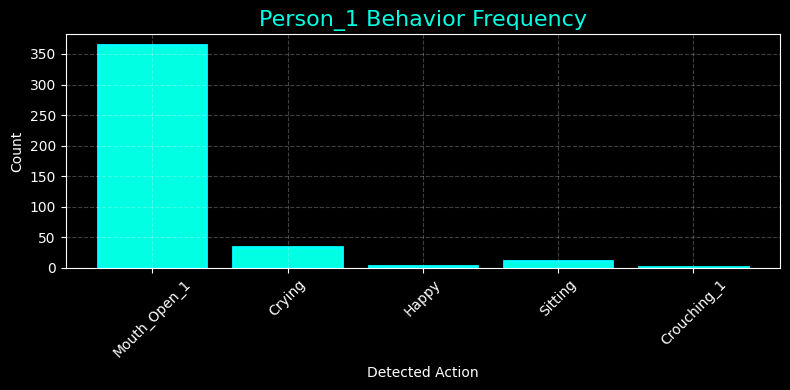

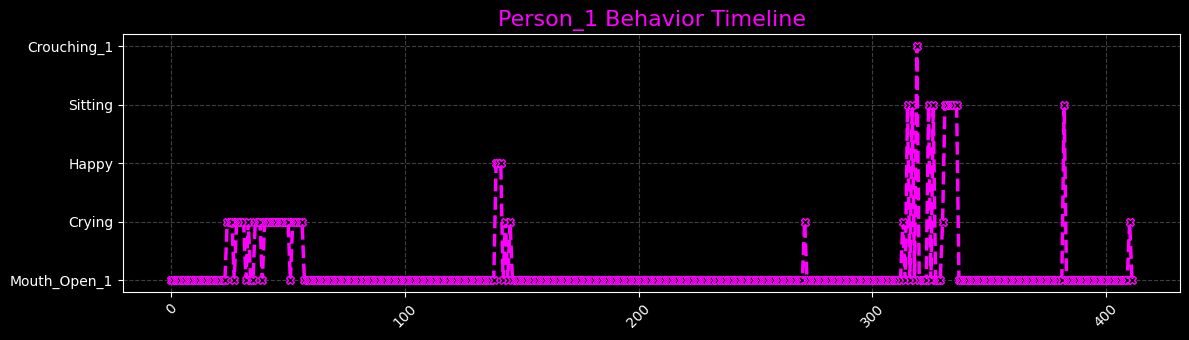

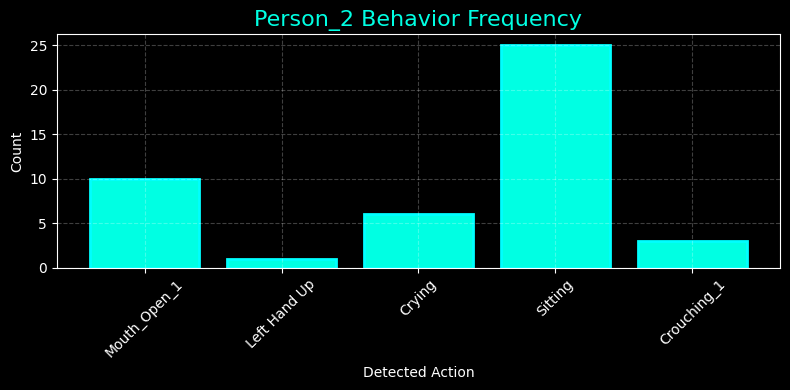

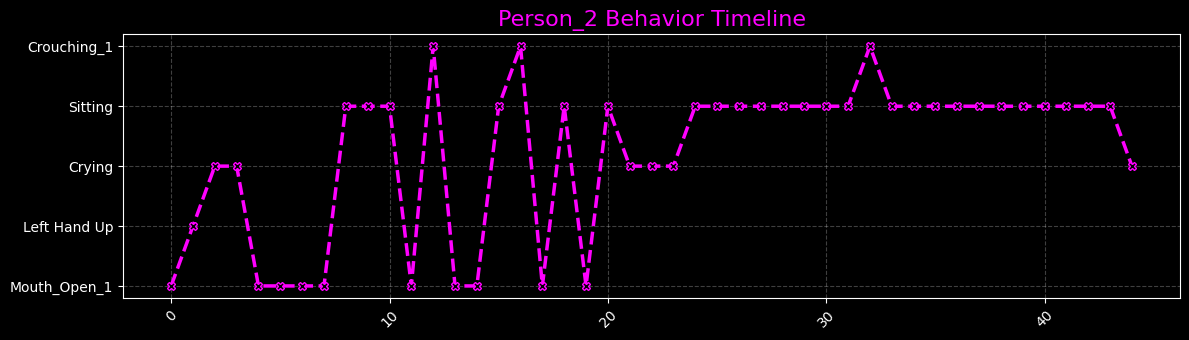

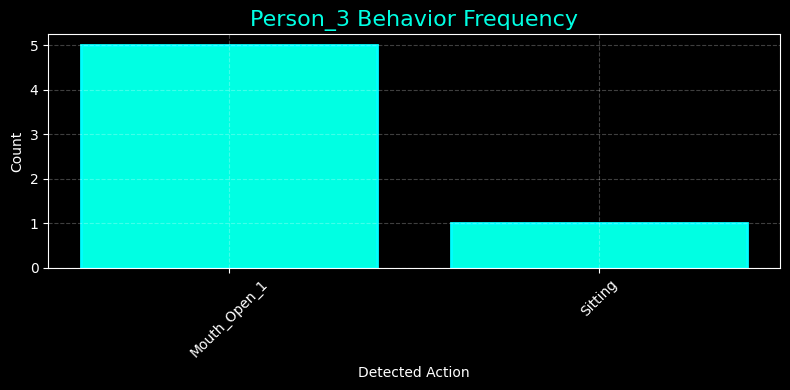

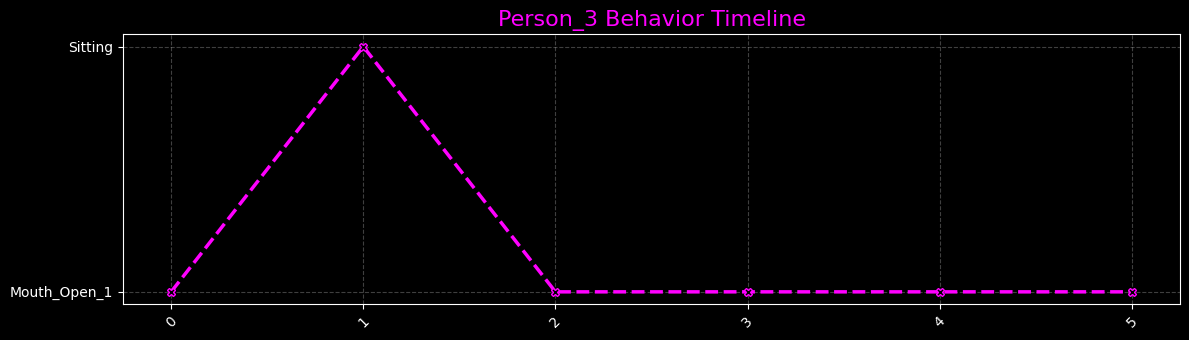

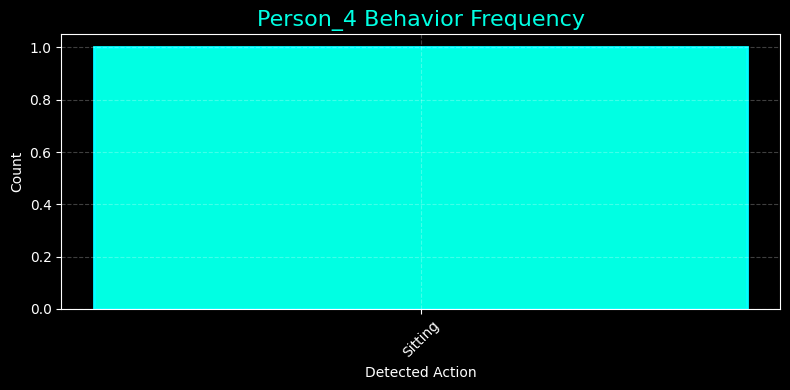

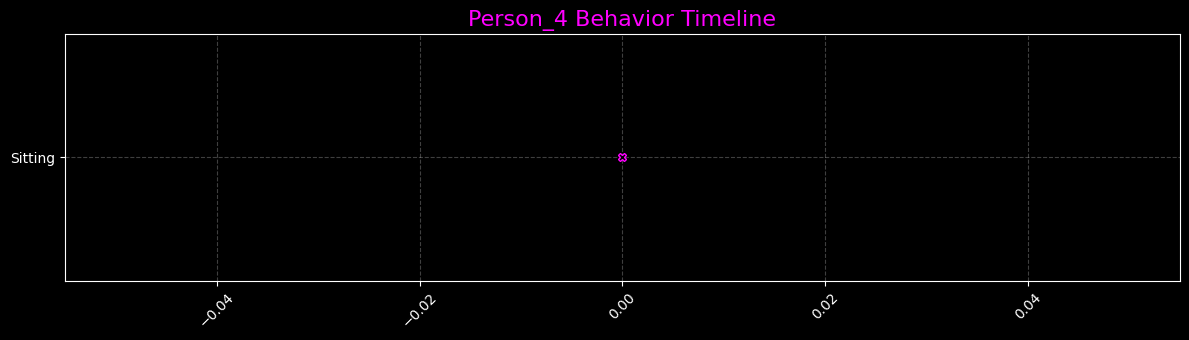

In [58]:
import cv2
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from ultralytics import YOLO
import mediapipe as mp
from gtts import gTTS
from playsound import playsound
import uuid, os

# === Load Models ===
yolo_model = YOLO("yolov8n.pt")
holistic = mp.solutions.holistic.Holistic(static_image_mode=False, model_complexity=1,
                                           min_detection_confidence=0.5, min_tracking_confidence=0.5)
model = joblib.load("Body_Tracking.pkl")

# === Feature Setup ===
feature_names = [f'{coord}{i}' for i in range(1, 2005) for coord in ['x', 'y', 'z', 'v']][:2004]
label_map = {
    0: "standing_still", 1: "covering_face", 2: "right_hand_up", 3: "left_hand_up",
    4: "crossed_arms", 5: "fear_1", 6: "happy", 7: "melancholy", 8: "calling_out"
}

# === Styling ===
neon_cyan = (0, 255, 255)
neon_magenta = (255, 0, 255)
neon_green = (0, 255, 0)

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

pose_style = mp_drawing.DrawingSpec(color=neon_green, thickness=3, circle_radius=4)
pose_conn_style = mp_drawing.DrawingSpec(color=(200, 0, 255), thickness=2, circle_radius=2)
face_style = mp_drawing.DrawingSpec(color=neon_cyan, thickness=1, circle_radius=2)
face_conn_style = mp_drawing.DrawingSpec(color=neon_magenta, thickness=1, circle_radius=1)
hand_style = mp_drawing.DrawingSpec(color=neon_cyan, thickness=3, circle_radius=3)
hand_conn_style = mp_drawing.DrawingSpec(color=neon_magenta, thickness=2, circle_radius=2)

# === Data Structures ===
FRAME_RATE = 20.0
multi_person_data = defaultdict(list)

# === Webcam Stream ===
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = yolo_model(frame, verbose=False)[0]
    person_boxes = [box for box in results.boxes.data.cpu().numpy() if int(box[5]) == 0 and box[4] > 0.3]

    for i, box in enumerate(person_boxes):
        x1, y1, x2, y2 = box[:4].astype(int)
        person_crop = cv2.resize(frame[y1:y2, x1:x2], (256, 256))
        rgb_crop = cv2.cvtColor(person_crop, cv2.COLOR_BGR2RGB)
        result = holistic.process(rgb_crop)
        overlay = person_crop.copy()

        # === Landmark Drawing ===
        if result.pose_landmarks:
            mp_drawing.draw_landmarks(overlay, result.pose_landmarks,
                                      mp_holistic.POSE_CONNECTIONS, pose_style, pose_conn_style)
        if result.face_landmarks:
            mp_drawing.draw_landmarks(overlay, result.face_landmarks,
                                      mp_face_mesh.FACEMESH_TESSELATION, face_style, face_conn_style)
        if result.left_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, result.left_hand_landmarks,
                                      mp_holistic.HAND_CONNECTIONS, hand_style, hand_conn_style)
        if result.right_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, result.right_hand_landmarks,
                                      mp_holistic.HAND_CONNECTIONS, hand_style, hand_conn_style)

        # === Prediction ===
        pose = result.pose_landmarks.landmark if result.pose_landmarks else []
        face = result.face_landmarks.landmark if result.face_landmarks else []

        # ✅ FIX: Convert containers to lists before adding
        row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility]
                             for lm in list(pose) + list(face)]).flatten())
        row = row[:len(feature_names)]
        row += [0.0] * (len(feature_names) - len(row))

        try:
            X = pd.DataFrame([row], columns=feature_names)
            pred_class = model.predict(X)[0]
            label = label_map.get(pred_class, str(pred_class))
            multi_person_data[f"Person_{i+1}"].append(label)

            # Overlay
            cv2.putText(frame, f"Person {i+1}: {label}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                        0.9, (255, 255, 255), 2)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 190, 255), 2)
            frame[y1:y2, x1:x2] = cv2.addWeighted(person_crop, 1.0, overlay, 0.6, 0)

        except Exception as e:
            print(f"Prediction error for Person {i+1}:", e)

    cv2.imshow("Multi-Person Behavior HUD", frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# === Graphical Diagnostics Per Person ===
plt.style.use('dark_background')
for pid, history in multi_person_data.items():
    if history:
        counts = Counter(history)
        # Frequency Bar Chart
        plt.figure(figsize=(8, 4))
        plt.bar(counts.keys(), counts.values(), color='#00FFE3', edgecolor='cyan', linewidth=2)
        plt.title(f"{pid} Behavior Frequency", fontsize=16, color='#00FFE3')
        plt.xlabel("Detected Action")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.grid(True, linestyle='--', alpha=0.25)
        plt.tight_layout()
        plt.show()

        # Timeline Plot
        plt.figure(figsize=(12, 3.5))
        plt.plot(history, marker='X', linestyle='--', linewidth=2.5,
                 color='#FF00FF', markerfacecolor='black', markeredgecolor='#FF00FF')
        plt.title(f"{pid} Behavior Timeline", fontsize=16, color='#FF00FF')
        plt.xticks(rotation=45)
        plt.grid(True, linestyle='--', alpha=0.25)
        plt.tight_layout()
        plt.show()

# === Voice Report Per Person ===
os.makedirs("audio_output", exist_ok=True)
voice_path = os.path.join("audio_output", f"voice_summary_{uuid.uuid4().hex}.mp3")

voice_text = ""
for pid, history in multi_person_data.items():
    if history:
        freq = Counter(history)
        dominant = max(freq, key=freq.get)
        voice_text += f"{pid} most frequently displayed '{dominant}'. "

if voice_text:
    gTTS(text=f"System analysis complete. {voice_text}", lang='en').save(voice_path)
    playsound(voice_path)

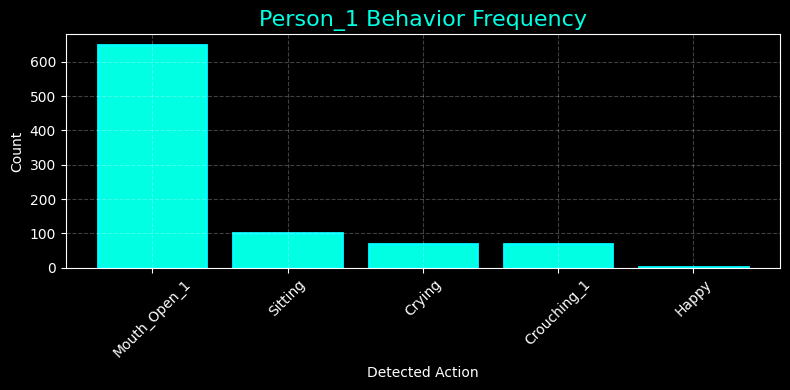

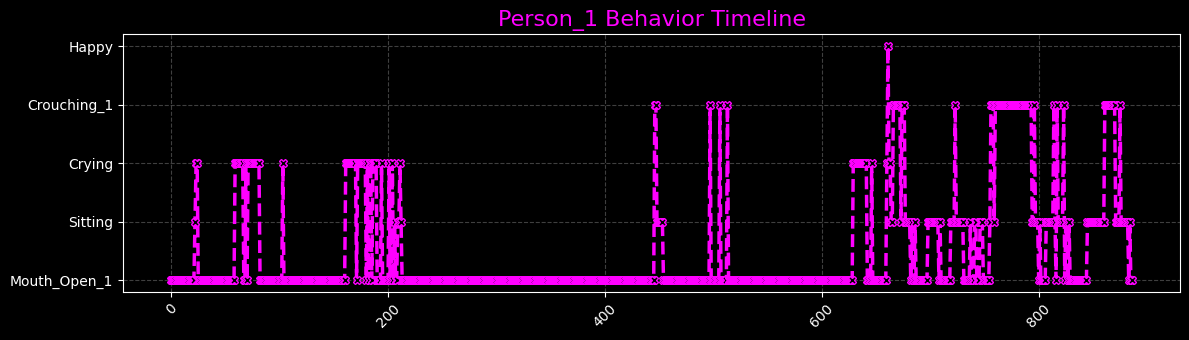

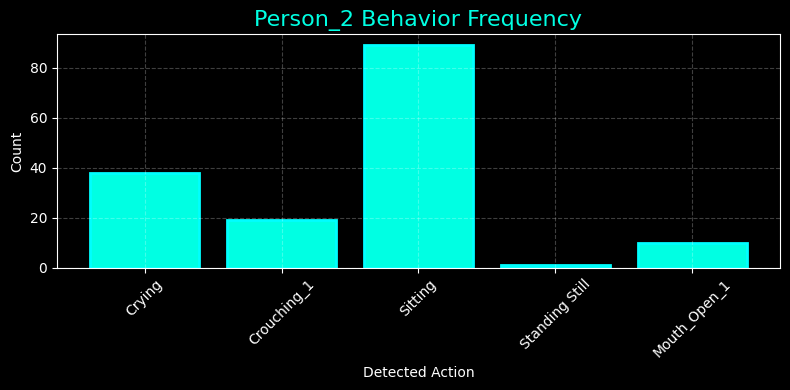

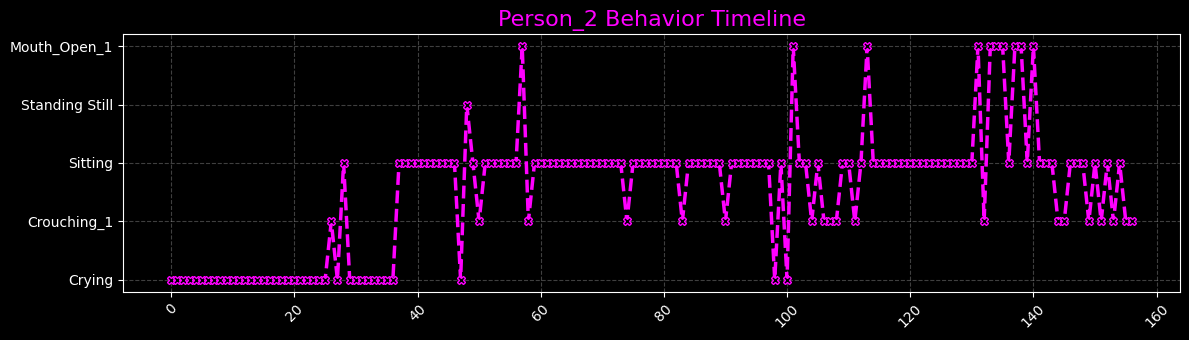

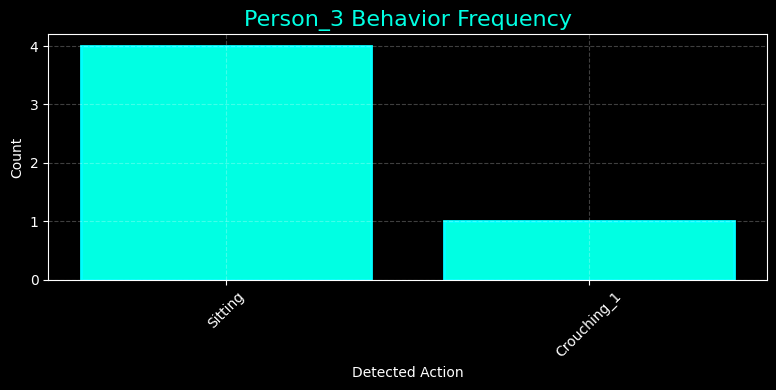

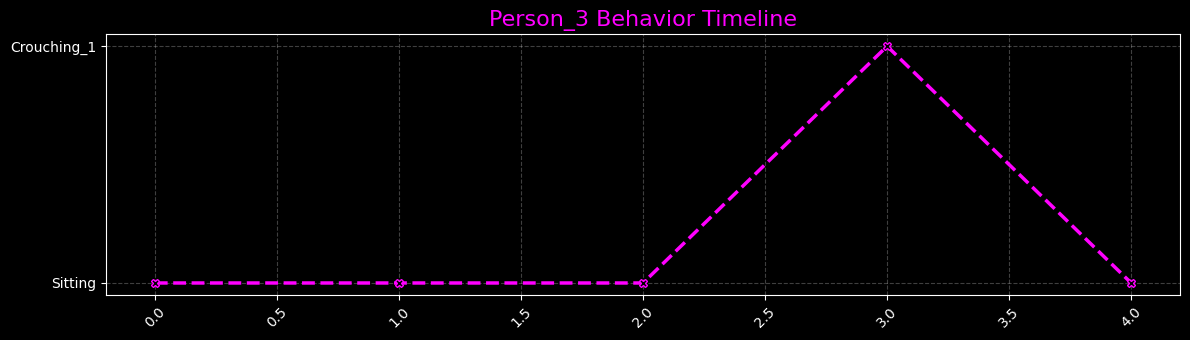

In [59]:
import cv2
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from ultralytics import YOLO
import mediapipe as mp
from gtts import gTTS
from playsound import playsound
import uuid, os

# === Load Models ===
yolo_model = YOLO("yolov8n.pt")
holistic = mp.solutions.holistic.Holistic(static_image_mode=False, model_complexity=1,
                                           min_detection_confidence=0.5, min_tracking_confidence=0.5)
model = joblib.load("Body_Tracking.pkl")

# === Feature Setup ===
feature_names = [f'{coord}{i}' for i in range(1, 2005) for coord in ['x', 'y', 'z', 'v']][:2004]
label_map = {
    0: "standing_still", 1: "covering_face", 2: "right_hand_up", 3: "left_hand_up",
    4: "crossed_arms", 5: "fear_1", 6: "happy", 7: "melancholy", 8: "calling_out"
}

# === Styling ===
neon_cyan = (0, 255, 255)
neon_magenta = (255, 0, 255)
neon_green = (0, 255, 0)
label_color = (255, 255, 255)

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

pose_style = mp_drawing.DrawingSpec(color=neon_green, thickness=2, circle_radius=4)
pose_conn_style = mp_drawing.DrawingSpec(color=(200, 0, 255), thickness=2, circle_radius=2)
face_style = mp_drawing.DrawingSpec(color=neon_cyan, thickness=1, circle_radius=2)
face_conn_style = mp_drawing.DrawingSpec(color=neon_magenta, thickness=1, circle_radius=1)
hand_style = mp_drawing.DrawingSpec(color=neon_cyan, thickness=2, circle_radius=3)
hand_conn_style = mp_drawing.DrawingSpec(color=neon_magenta, thickness=2, circle_radius=2)

# === Data Storage ===
FRAME_RATE = 20.0
multi_person_data = defaultdict(list)

# === Webcam Stream ===
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = yolo_model(frame, verbose=False)[0]
    person_boxes = [box for box in results.boxes.data.cpu().numpy() if int(box[5]) == 0 and box[4] > 0.3]

    for i, box in enumerate(person_boxes):
        x1, y1, x2, y2 = box[:4].astype(int)
        person_crop = cv2.resize(frame[y1:y2, x1:x2], (256, 256))
        rgb_crop = cv2.cvtColor(person_crop, cv2.COLOR_BGR2RGB)
        result = holistic.process(rgb_crop)
        overlay = person_crop.copy()

        # === Draw Visible Landmarks ===
        if result.pose_landmarks:
            mp_drawing.draw_landmarks(overlay, result.pose_landmarks,
                                      mp_holistic.POSE_CONNECTIONS, pose_style, pose_conn_style)
        if result.face_landmarks:
            mp_drawing.draw_landmarks(overlay, result.face_landmarks,
                                      mp_face_mesh.FACEMESH_CONTOURS, face_style, face_conn_style)
        if result.left_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, result.left_hand_landmarks,
                                      mp_holistic.HAND_CONNECTIONS, hand_style, hand_conn_style)
        if result.right_hand_landmarks:
            mp_drawing.draw_landmarks(overlay, result.right_hand_landmarks,
                                      mp_holistic.HAND_CONNECTIONS, hand_style, hand_conn_style)

        # === Prediction ===
        pose = result.pose_landmarks.landmark if result.pose_landmarks else []
        face = result.face_landmarks.landmark if result.face_landmarks else []
        left_hand = result.left_hand_landmarks.landmark if result.left_hand_landmarks else []
        right_hand = result.right_hand_landmarks.landmark if result.right_hand_landmarks else []

        row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility]
                             for lm in list(pose) + list(face) + list(left_hand) + list(right_hand)]).flatten())
        row = row[:len(feature_names)]
        row += [0.0] * (len(feature_names) - len(row))

        try:
            X = pd.DataFrame([row], columns=feature_names)
            pred_class = model.predict(X)[0]
            label = label_map.get(pred_class, str(pred_class))
            multi_person_data[f"Person_{i+1}"].append(label)

            # === Display Label Only (no box) ===
            label_position = (x1 + 5, y1 + 20)
            cv2.putText(frame, f"Person {i+1}: {label}", label_position,
                        cv2.FONT_HERSHEY_SIMPLEX, 0.75, label_color, 2)

            # === Blend overlay landmarks into original frame ===
            resized_overlay = cv2.resize(overlay, (x2 - x1, y2 - y1))
            frame[y1:y2, x1:x2] = cv2.addWeighted(frame[y1:y2, x1:x2], 1.0, resized_overlay, 0.65, 0)

        except Exception as e:
            print(f"Prediction error for Person {i+1}:", e)

    cv2.imshow("Multi-Person HUD with Label & Landmarks", frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# === Graphical Diagnostics Per Person ===
plt.style.use('dark_background')
for pid, history in multi_person_data.items():
    if history:
        counts = Counter(history)
        plt.figure(figsize=(8, 4))
        plt.bar(counts.keys(), counts.values(), color='#00FFE3', edgecolor='cyan', linewidth=2)
        plt.title(f"{pid} Behavior Frequency", fontsize=16, color='#00FFE3')
        plt.xlabel("Detected Action")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.grid(True, linestyle='--', alpha=0.25)
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(12, 3.5))
        plt.plot(history, marker='X', linestyle='--', linewidth=2.5,
                 color='#FF00FF', markerfacecolor='black', markeredgecolor='#FF00FF')
        plt.title(f"{pid} Behavior Timeline", fontsize=16, color='#FF00FF')
        plt.xticks(rotation=45)
        plt.grid(True, linestyle='--', alpha=0.25)
        plt.tight_layout()
        plt.show()

# === Voice Report ===
os.makedirs("audio_output", exist_ok=True)
voice_path = os.path.join("audio_output", f"voice_summary_{uuid.uuid4().hex}.mp3")

voice_text = ""
for pid, history in multi_person_data.items():
    if history:
        freq = Counter(history)
        dominant = max(freq, key=freq.get)
        voice_text += f"{pid} most frequently showed '{dominant}'. "

if voice_text:
    gTTS(text=f"System analysis complete. {voice_text}", lang='en').save(voice_path)
    playsound(voice_path)

In [60]:
import cv2
import time

cap = cv2.VideoCapture(0)

# Get resolution
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

# Measure FPS
start_time = time.time()
frames = 0

while frames < 120:  # capture 120 frames for testing
    ret, frame = cap.read()
    if not ret:
        break
    frames += 1

end_time = time.time()
elapsed = end_time - start_time
fps = frames / elapsed

cap.release()

print(f"Camera Resolution: {int(width)} x {int(height)}")
print(f"Estimated FPS: {fps:.2f}")

Camera Resolution: 640 x 480
Estimated FPS: 24.21


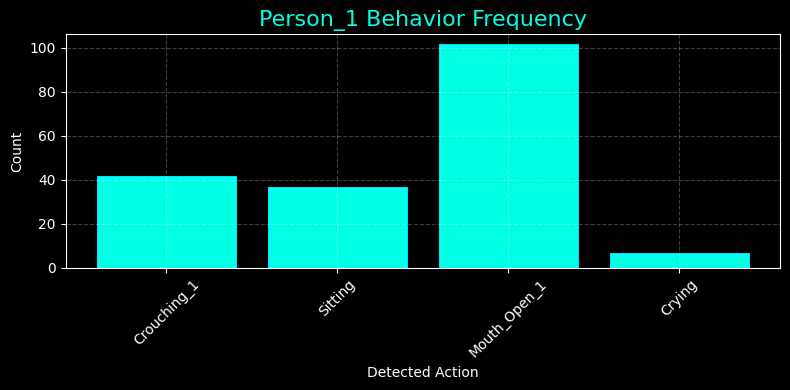

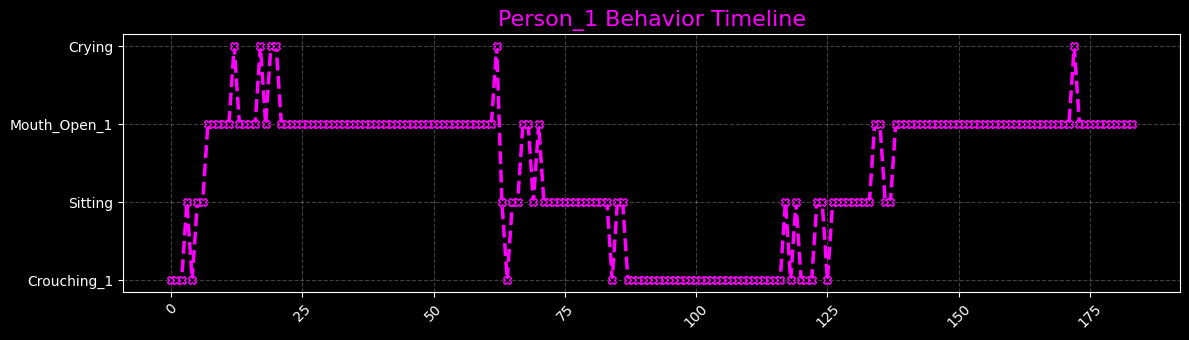

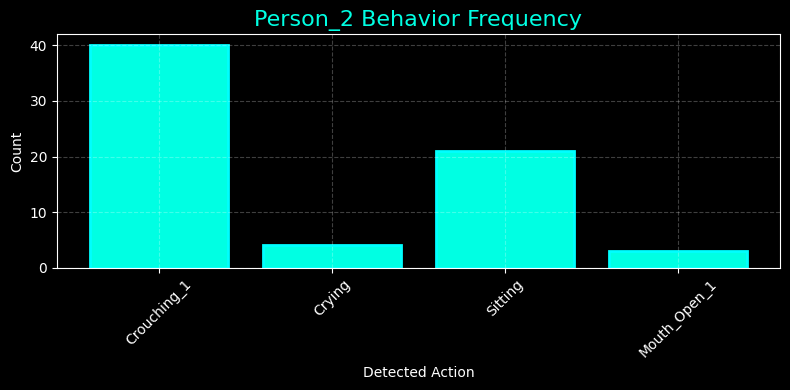

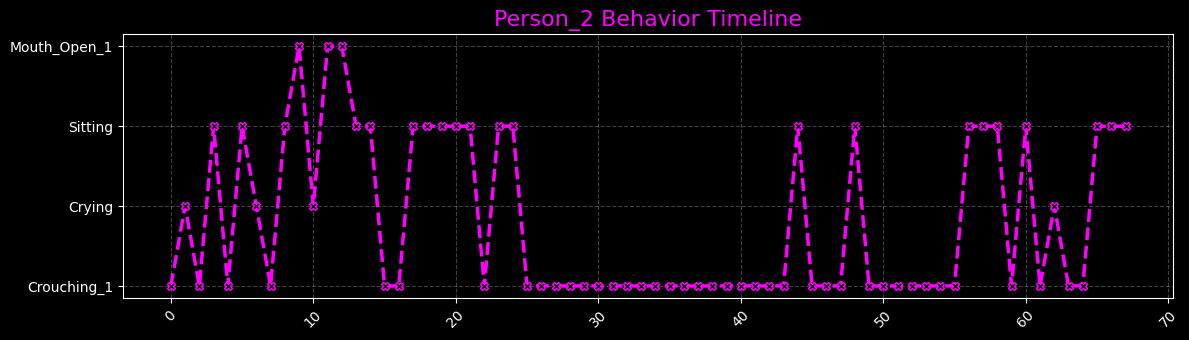

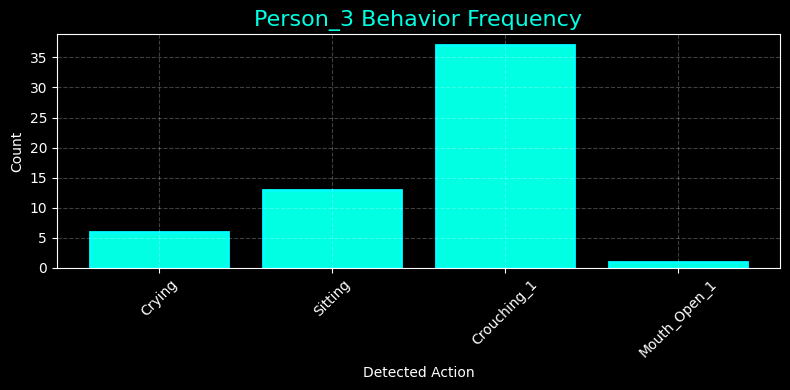

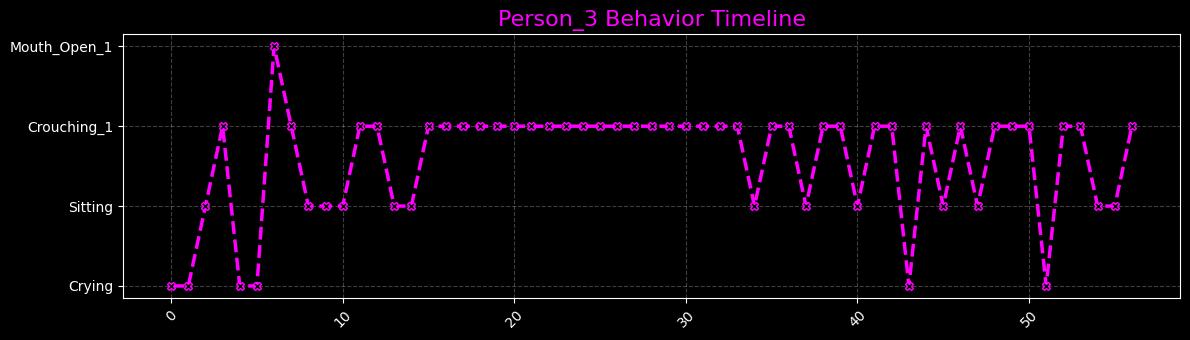

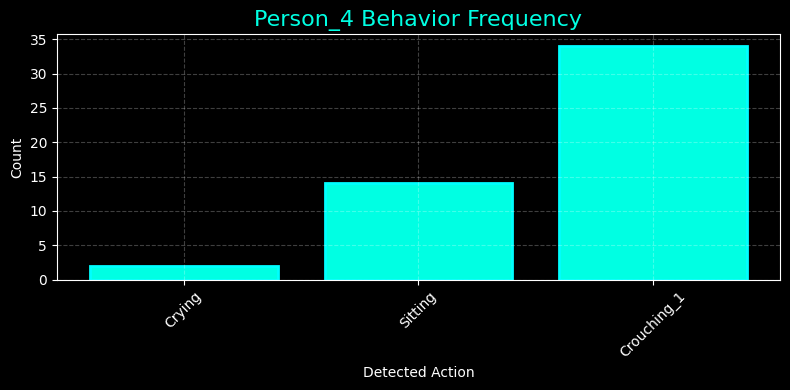

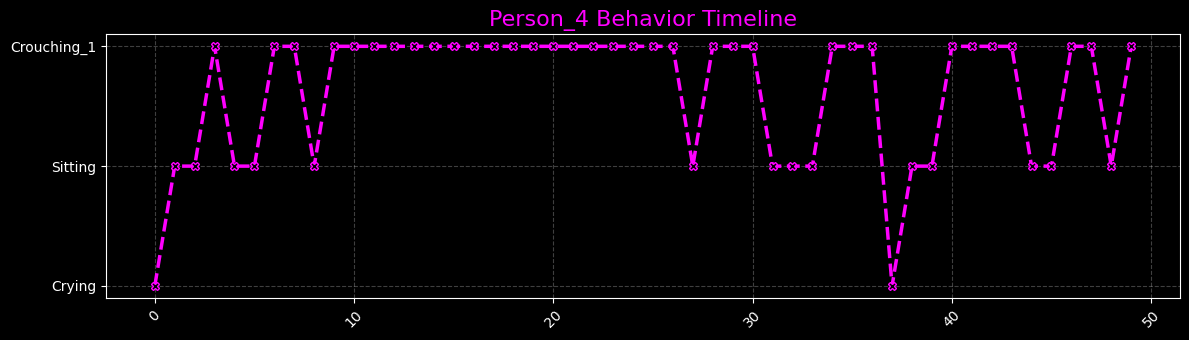

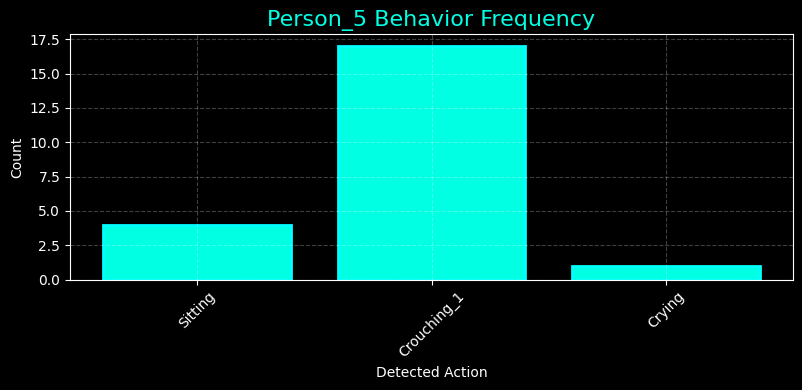

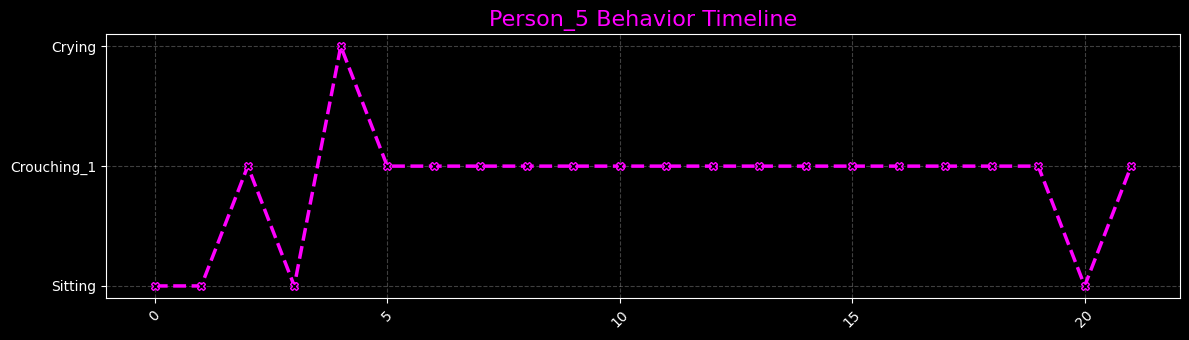

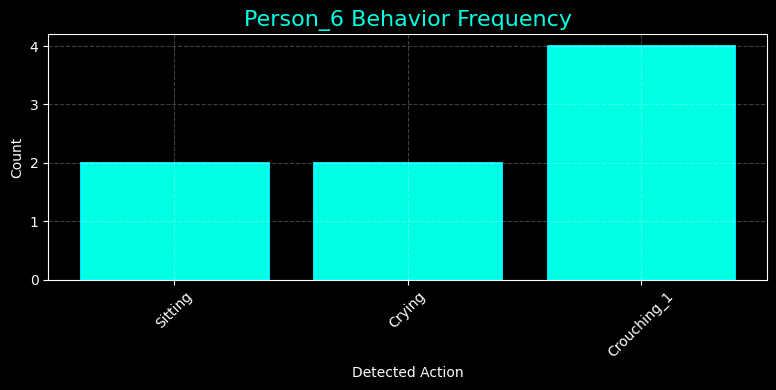

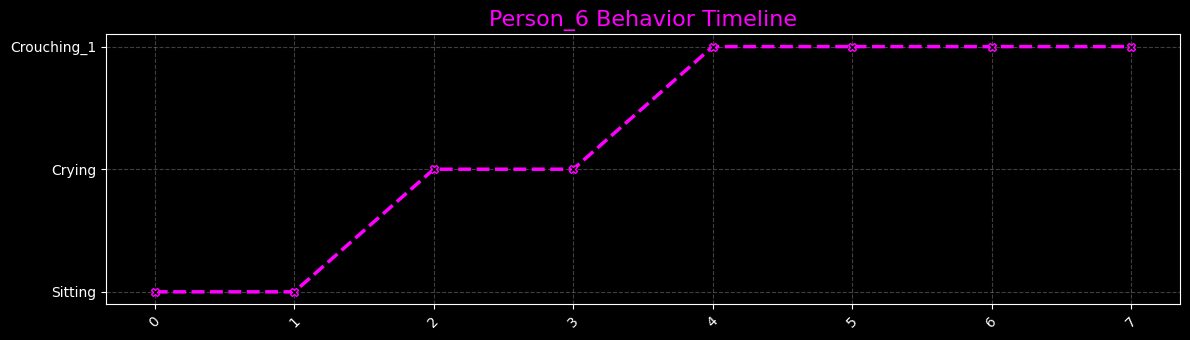

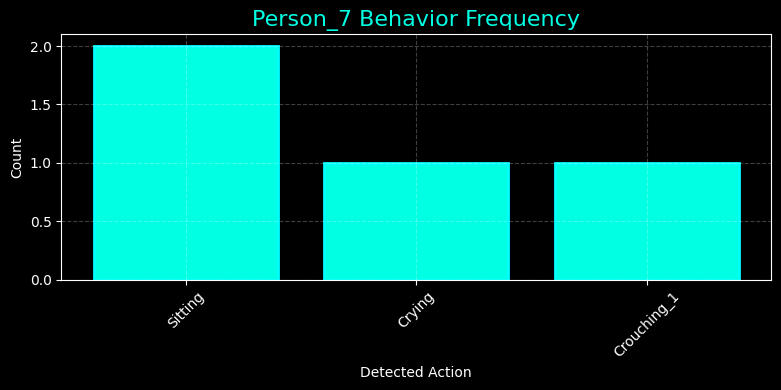

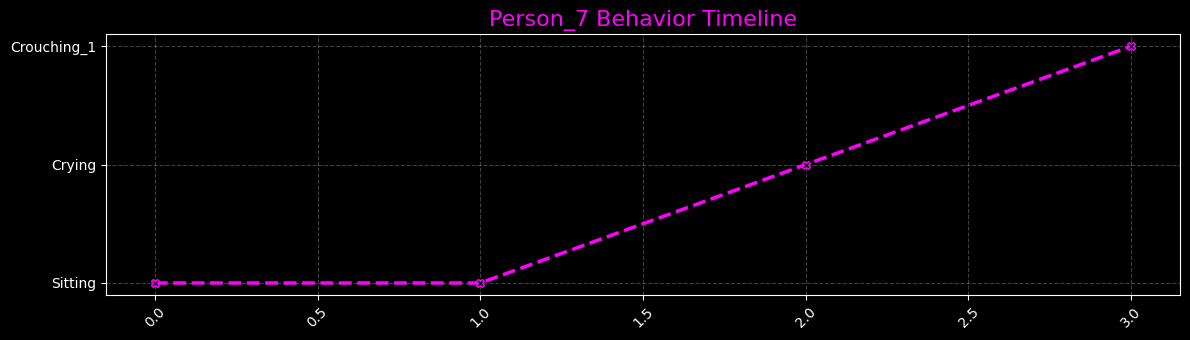

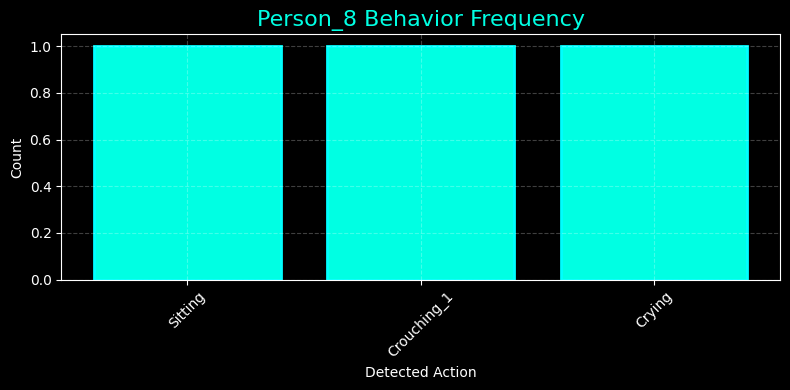

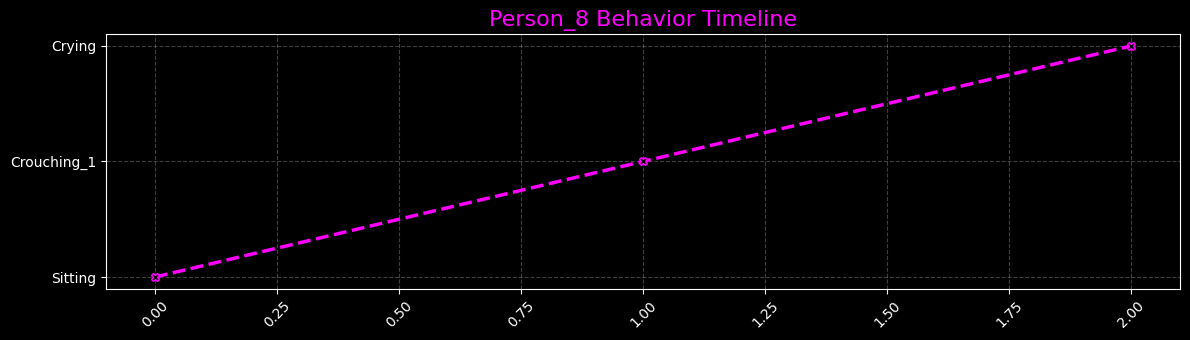

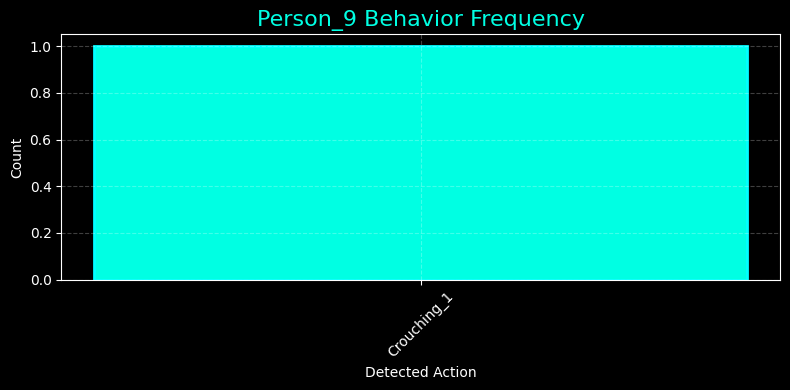

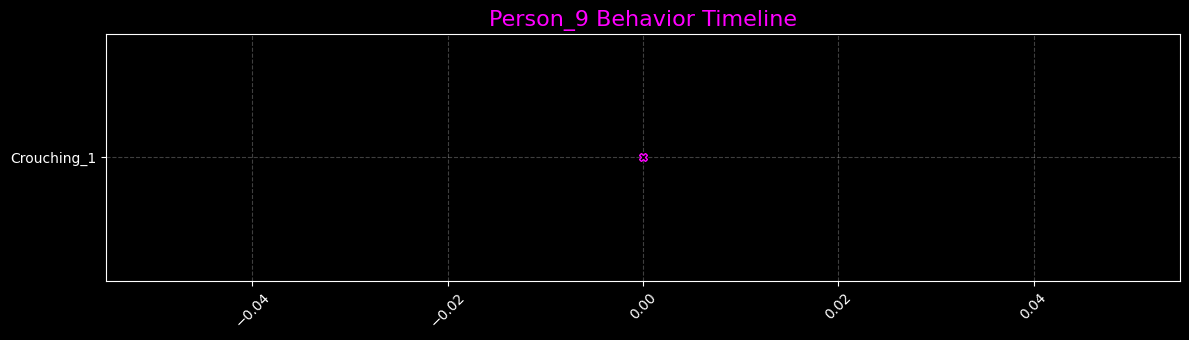

In [63]:
import cv2
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from ultralytics import YOLO
import mediapipe as mp
from gtts import gTTS
from playsound import playsound
import uuid, os

# === Calibrated Settings ===
FRAME_RATE = 24.21
RESIZED_WIDTH, RESIZED_HEIGHT = 256, 256

# === Load Models ===
yolo_model = YOLO("yolov8n.pt")
holistic = mp.solutions.holistic.Holistic(static_image_mode=False, model_complexity=1,
                                           min_detection_confidence=0.5, min_tracking_confidence=0.5)
model = joblib.load("Body_Tracking.pkl")

feature_names = [f'{coord}{i}' for i in range(1, 2005) for coord in ['x', 'y', 'z', 'v']][:2004]
label_map = {
    0: "standing_still", 1: "covering_face", 2: "right_hand_up", 3: "left_hand_up",
    4: "crossed_arms", 5: "fear_1", 6: "happy", 7: "melancholy", 8: "calling_out"
}

# === Styling ===
neon_cyan = (0, 255, 255)
neon_magenta = (255, 0, 255)
neon_green = (0, 255, 0)
label_color = (255, 255, 255)

pose_style = mp.solutions.drawing_utils.DrawingSpec(color=neon_green, thickness=2, circle_radius=4)
pose_conn_style = mp.solutions.drawing_utils.DrawingSpec(color=(200, 0, 255), thickness=2, circle_radius=2)
face_style = mp.solutions.drawing_utils.DrawingSpec(color=neon_cyan, thickness=1, circle_radius=2)
face_conn_style = mp.solutions.drawing_utils.DrawingSpec(color=neon_magenta, thickness=1, circle_radius=1)
hand_style = mp.solutions.drawing_utils.DrawingSpec(color=neon_cyan, thickness=2, circle_radius=3)
hand_conn_style = mp.solutions.drawing_utils.DrawingSpec(color=neon_magenta, thickness=2, circle_radius=2)

# === Data Storage ===
multi_person_data = defaultdict(list)

# === Webcam Stream ===
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = yolo_model(frame, verbose=False)[0]
    person_boxes = [box for box in results.boxes.data.cpu().numpy() if int(box[5]) == 0 and box[4] > 0.3]

    for i, box in enumerate(person_boxes):
        x1, y1, x2, y2 = box[:4].astype(int)

        # Resize + apply soft mask
        person_crop = cv2.resize(frame[y1:y2, x1:x2], (RESIZED_WIDTH, RESIZED_HEIGHT))
        mask = np.zeros_like(person_crop)
        cv2.rectangle(mask, (0, 0), (RESIZED_WIDTH, RESIZED_HEIGHT), (40, 40, 40), -1)
        masked_person = cv2.addWeighted(person_crop, 1.0, mask, 0.3, 0)
        rgb_crop = cv2.cvtColor(masked_person, cv2.COLOR_BGR2RGB)

        result = holistic.process(rgb_crop)
        overlay = masked_person.copy()

        # === Landmarks ===
        if result.pose_landmarks:
            mp.solutions.drawing_utils.draw_landmarks(overlay, result.pose_landmarks,
                mp.solutions.holistic.POSE_CONNECTIONS, pose_style, pose_conn_style)
        if result.face_landmarks:
            mp.solutions.drawing_utils.draw_landmarks(overlay, result.face_landmarks,
                mp.solutions.face_mesh.FACEMESH_CONTOURS, face_style, face_conn_style)
        if result.left_hand_landmarks:
            mp.solutions.drawing_utils.draw_landmarks(overlay, result.left_hand_landmarks,
                mp.solutions.holistic.HAND_CONNECTIONS, hand_style, hand_conn_style)
        if result.right_hand_landmarks:
            mp.solutions.drawing_utils.draw_landmarks(overlay, result.right_hand_landmarks,
                mp.solutions.holistic.HAND_CONNECTIONS, hand_style, hand_conn_style)

        # === Prediction ===
        pose = result.pose_landmarks.landmark if result.pose_landmarks else []
        face = result.face_landmarks.landmark if result.face_landmarks else []
        left_hand = result.left_hand_landmarks.landmark if result.left_hand_landmarks else []
        right_hand = result.right_hand_landmarks.landmark if result.right_hand_landmarks else []

        row = list(np.array([[lm.x, lm.y, lm.z, lm.visibility]
                             for lm in list(pose) + list(face) + list(left_hand) + list(right_hand)]).flatten())
        row = row[:len(feature_names)]
        row += [0.0] * (len(feature_names) - len(row))

        try:
            X = pd.DataFrame([row], columns=feature_names)
            pred_class = model.predict(X)[0]
            label = label_map.get(pred_class, str(pred_class))
            multi_person_data[f"Person_{i+1}"].append(label)

            # === Display Label with Shadow ===
            label_position = (x1 + 5, y1 + 20)
            cv2.putText(frame, f"Person {i+1}: {label}", label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 0), 4)
            cv2.putText(frame, f"Person {i+1}: {label}", label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.75, label_color, 2)

            # === Blend Overlay ===
            resized_overlay = cv2.resize(overlay, (x2 - x1, y2 - y1))
            frame[y1:y2, x1:x2] = cv2.addWeighted(frame[y1:y2, x1:x2], 1.0, resized_overlay, 0.35, 0)

        except Exception as e:
            print(f"Prediction error for Person {i+1}:", e)

    cv2.imshow("HUD: Responsive Multi-Person Tracker", frame)
    if cv2.waitKey(int(1000 / FRAME_RATE)) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# === Graphical Diagnostics ===
plt.style.use('dark_background')
for pid, history in multi_person_data.items():
    if history:
        counts = Counter(history)
        plt.figure(figsize=(8, 4))
        plt.bar(counts.keys(), counts.values(), color='#00FFE3', edgecolor='cyan', linewidth=2)
        plt.title(f"{pid} Behavior Frequency", fontsize=16, color='#00FFE3')
        plt.xlabel("Detected Action")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.grid(True, linestyle='--', alpha=0.25)
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(12, 3.5))
        plt.plot(history, marker='X', linestyle='--', linewidth=2.5,
                 color='#FF00FF', markerfacecolor='black', markeredgecolor='#FF00FF')
        plt.title(f"{pid} Behavior Timeline", fontsize=16, color='#FF00FF')
        plt.xticks(rotation=45)
        plt.grid(True, linestyle='--', alpha=0.25)
        plt.tight_layout()
        plt.show()

# === Voice Report ===
os.makedirs("audio_output", exist_ok=True)
voice_path = os.path.join("audio_output", f"voice_summary_{uuid.uuid4().hex}.mp3")

voice_text = ""
for pid, history in multi_person_data.items():
    if history:
        freq = Counter(history)
        dominant = max(freq, key=freq.get)
        voice_text += f"{pid} most frequently showed '{dominant}'. "

if voice_text:
    gTTS(text=f"System analysis complete. {voice_text}", lang='en').save(voice_path)
    playsound(voice_path)

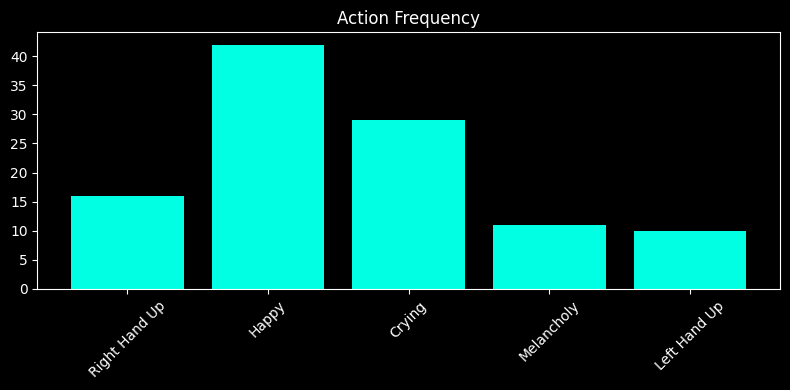

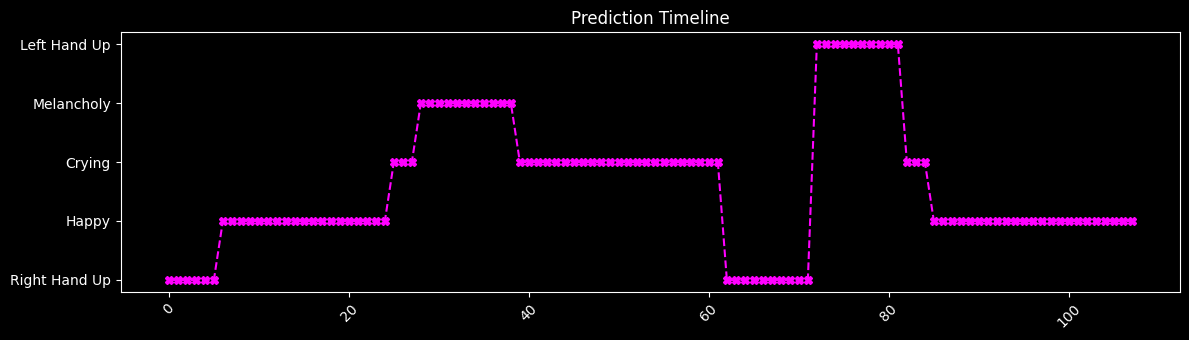

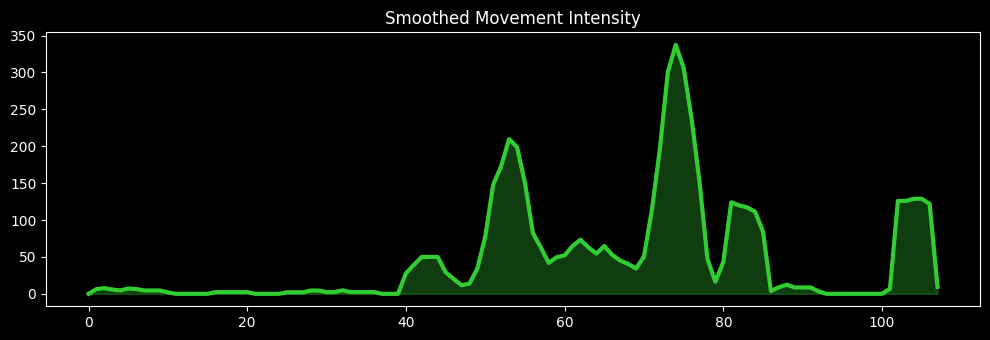

In [50]:
import cv2, mediapipe as mp, numpy as np, pandas as pd, joblib, matplotlib.pyplot as plt
from collections import Counter
from gtts import gTTS
from playsound import playsound
import os, uuid

# === Load Model & Settings ===
model = joblib.load("Body_Tracking.pkl")
feature_names = [f'{c}{i}' for i in range(1, 2005) for c in 'xyzv'][:2004]
label_map = {0: "standing_still", 1: "covering_face", 2: "right_hand_up", 3: "left_hand_up",
             4: "crossed_arms", 5: "fear_1", 6: "happy", 7: "melancholy", 8: "calling_out"}
FRAME_RATE = 24.21
prediction_history, smoothed_scores, movement_raw = [], [], []
previous_landmarks = None

# === Drawing Styles ===
draw = mp.solutions.drawing_utils
neon_cyan, neon_magenta, neon_green = (0,255,255), (255,0,255), (0,255,0)
face_style = draw.DrawingSpec(neon_cyan,1,2); face_conn = draw.DrawingSpec(neon_magenta,1,1)
pose_style = draw.DrawingSpec(neon_green,2,3); pose_conn = draw.DrawingSpec((200,0,255),2,2)
hand_style = draw.DrawingSpec(neon_cyan,2,3); hand_conn = draw.DrawingSpec(neon_magenta,2,2)

# === Tracker ===
class IDTracker:
    def __init__(self, t=0.12): self.ids, self.next, self.t = {}, 1, t
    def assign(self, lm):
        c = np.mean([[l.x,l.y] for l in lm.landmark], axis=0)
        for pid, p in self.ids.items():
            if np.linalg.norm(c - p) < self.t: self.ids[pid] = c; return pid
        pid = f"person_{self.next}"; self.ids[pid] = c; self.next += 1; return pid

tracker = IDTracker()
cap = cv2.VideoCapture(0)
with mp.solutions.holistic.Holistic(
    static_image_mode=True,
    model_complexity=1,
    smooth_landmarks=False,
    enable_segmentation=True,
    smooth_segmentation=True,
    refine_face_landmarks=True,
    min_detection_confidence=0.6,
    min_tracking_confidence=0.6
) as hol:
    while cap.isOpened():
        r, f = cap.read(); 
        if not r: break
        i = cv2.cvtColor(f, cv2.COLOR_BGR2RGB)
        r = hol.process(i)
        i = cv2.cvtColor(i, cv2.COLOR_RGB2BGR); o = i.copy()

        if r.pose_landmarks:
            pid = tracker.assign(r.pose_landmarks)

            # Landmark drawing
            if r.face_landmarks: draw.draw_landmarks(o,r.face_landmarks,mp.solutions.face_mesh.FACEMESH_TESSELATION,face_style,face_conn)
            if r.left_hand_landmarks: draw.draw_landmarks(o,r.left_hand_landmarks,mp.solutions.holistic.HAND_CONNECTIONS,hand_style,hand_conn)
            if r.right_hand_landmarks: draw.draw_landmarks(o,r.right_hand_landmarks,mp.solutions.holistic.HAND_CONNECTIONS,hand_style,hand_conn)
            draw.draw_landmarks(o,r.pose_landmarks,mp.solutions.holistic.POSE_CONNECTIONS,pose_style,pose_conn)
            i = cv2.addWeighted(i, 1.0, o, 0.35, 0)

            # Movement scoring
            key = [mp.solutions.holistic.PoseLandmark.LEFT_SHOULDER, mp.solutions.holistic.PoseLandmark.RIGHT_SHOULDER,
                   mp.solutions.holistic.PoseLandmark.LEFT_ELBOW, mp.solutions.holistic.PoseLandmark.RIGHT_ELBOW,
                   mp.solutions.holistic.PoseLandmark.LEFT_KNEE, mp.solutions.holistic.PoseLandmark.RIGHT_KNEE]
            cur = [r.pose_landmarks.landmark[i] for i in key if r.pose_landmarks.landmark[i].visibility > 0.6]
            move = 0.0
            if previous_landmarks and len(cur)==len(previous_landmarks):
                dists = [np.linalg.norm(np.array([c.x,c.y]) - np.array([p.x,p.y])) for c,p in zip(cur,previous_landmarks) if np.linalg.norm(np.array([c.x,c.y])-np.array([p.x,p.y]))>0.01]
                move = round(sum(dists)*1000,2)
            previous_landmarks = cur
            movement_raw.append(move)
            smoothed_scores.append(round(np.mean(movement_raw[-5:]),2))

            # 🛠 FIXED: Combine pose and face landmarks safely
            pose = list(r.pose_landmarks.landmark) if r.pose_landmarks else []
            face = list(r.face_landmarks.landmark) if r.face_landmarks else []
            row = list(np.array([[lm.x,lm.y,lm.z,lm.visibility] for lm in pose + face]).flatten())
            row = row[:len(feature_names)] + [0.0]*(len(feature_names)-len(row))
            X = pd.DataFrame([row], columns=feature_names)

            try:
                pred = model.predict(X)[0]
                label = label_map.get(pred,str(pred))
                prediction_history.append(label)
                cv2.putText(i,f"{pid}: {label}",(20,40+30*int(pid.split('_')[-1])),cv2.FONT_HERSHEY_SIMPLEX,0.9,(0,255,255),2)
            except: pass

        cv2.imshow("Multi-Person Sci-Fi HUD", i)
        if cv2.waitKey(10) & 0xFF == ord('q'): break

cap.release()
cv2.destroyAllWindows()

# === Graphs
if prediction_history:
    Counter_ = Counter(prediction_history)
    plt.style.use('dark_background')
    plt.figure(figsize=(8,4))
    plt.bar(Counter_.keys(), Counter_.values(), color='#00FFE3')
    plt.title("Action Frequency"); plt.xticks(rotation=45); plt.tight_layout(); plt.show()

    plt.figure(figsize=(12,3.5))
    plt.plot(prediction_history, marker='X', linestyle='--', color='#FF00FF')
    plt.title("Prediction Timeline"); plt.xticks(rotation=45); plt.tight_layout(); plt.show()

    plt.figure(figsize=(10,3.5))
    plt.plot(range(len(smoothed_scores)), smoothed_scores, color='#32CD32', linewidth=3)
    plt.fill_between(range(len(smoothed_scores)), smoothed_scores, alpha=0.3, color='#32CD32')
    plt.title("Smoothed Movement Intensity"); plt.tight_layout(); plt.show()

# === Voice Summary
os.makedirs("audio_output", exist_ok=True)
f_name = f"report_{uuid.uuid4().hex}.mp3"; path = os.path.join("audio_output", f_name)
most = max(Counter_, key=Counter_.get)
peak = max(smoothed_scores); peak_time = smoothed_scores.index(peak) / FRAME_RATE
total = len(smoothed_scores) / FRAME_RATE

msg = (f"Commander, system analyzed {len(prediction_history)} behavioral snapshots. "
       f"The most frequent action was '{most}'. Average intensity: {np.mean(smoothed_scores):.2f} units. "
       f"Peak movement was {peak:.2f} units at {peak_time:.2f} seconds. Total duration: {total:.2f} seconds.")
gTTS(text=msg, lang='en').save(path); playsound(path)

In [57]:
import sys
print(sys.version)

3.9.23 (main, Jun  5 2025, 13:25:08) [MSC v.1929 64 bit (AMD64)]


In [13]:
###################################### NEW

In [14]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.4.1
